# **Identifying Drivers Behind MyChart Enrollment for Dana Farber Cancer Institute** 

Team B6: 
</div>
*   Aaron Wen
*   Mohammed AlQenae
*   Kexi Pi
*   Deniz Ipek Ozakyol
*   Rohan Gupta 








## **Problem Statement and Project Goal**

The Patient Reported Data (PRD) program at Dana Farber Cancer Institute is devoted to increase operational efficiency, improve clinical outcomes and empower discovery and innovation through the implementation and analysis of various PRD documentation. This program has numerous questionnaires to manage patients’ symptoms. Patients can report their symptoms through a PRD portal “MyChart” or can use the iPad in the clinic on the day of their visit. Through the MyChart portal, patients can answer questionnaires and connect with their providers. Providers can monitor and manage patients personal and family medical history, symptoms and adverse events, and physical/mental health status. With this project, we hope to shed a light on the drivers behind MyChart enrollment. By analyzing the data, we are aiming to provide the demographics characteristics of patients, which group of patients we need to target to increase their enrollment based on their response rates also. We also aim to train a model to predict MyChart enrollment status followed by providing recommendations to increase patients’ enrollment status based on our analysis.


## **Outline**

* Preprocessing

* Overall EDA: Patients' demographics in general

* Q1: What are the demographic characteristics of different MyChart status?

* Q2:Do patients' questionnaire answers affect patients' MyChart status?

* Q3: How are the questionnaire responders different from non-responders?

* Q4: Which groups of patients to target for increasing enrollment?

  * a) Can we identify demographic or other characteristics of patient groups that exhibit different MyChart enrollment rates?
  *  b) Can we develop a model to predict MyChart enrollment?











## **Preprocessing**

### **Imports**

Importing packages

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import statsmodels.api as sm
import missingno as msno
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.api import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller
from itertools import product
import time
from sklearn import metrics
from IPython.lib.display import IFrame
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import VarianceThreshold

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Mounting Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Note: The datasets which are uploaded and cleaned below are used for most of the questions, there are some sections in which the datasets are uploaded again since the nature of the question requires a different cleaning/feature engineering strategy.

### **Importing the Demographics dataset**

Loading the demographics dataset

In [ ]:
data=pd.read_csv('/content/drive/Shareddrives/Capstone-B6/Dataset/Dataset_Demographics_1_6_22.csv')

Checking for missing values

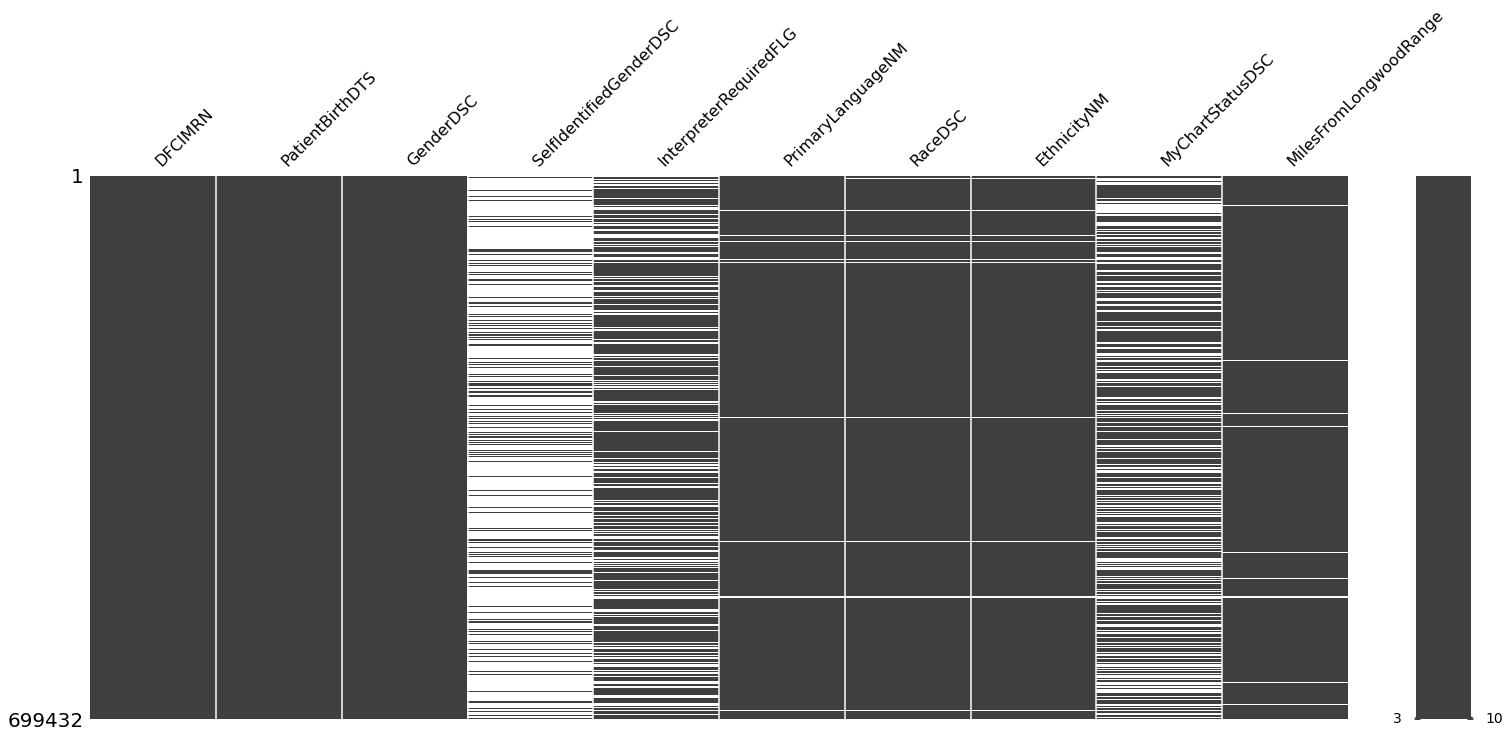

In [ ]:
#This plot helps us to look for missing values, the rows in white are the missing values
msno.matrix(data)

Dropping the "SelfIdentifiedGenderDSC" column since it has a lot of missing values

In [ ]:
#Dropping this column
data.drop('SelfIdentifiedGenderDSC',axis=1,inplace=True)

In [ ]:
data['InterpreterRequiredFLG'].loc[(data['InterpreterRequiredFLG'].isnull()) & (data['PrimaryLanguageNM'] == 'English')] = 'N'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


Changing the type of the MyChart Status column to string

In [ ]:
data['MyChartStatusDSC'] = data['MyChartStatusDSC'].astype(str)

Lookig at the count of the different MyChart Status

In [ ]:
data.groupby('MyChartStatusDSC').DFCIMRN.count()

MyChartStatusDSC
Activated                                  253965
Activation Code Generated, but Disabled        27
Inactivated                                 46142
Non Standard MyChart Status                 41865
Patient Declined                            11893
Pending Activation                          85781
nan                                        259759
Name: DFCIMRN, dtype: int64

Replacing Nan values to Unknown

In [ ]:
data['MyChartStatusDSC'] = data['MyChartStatusDSC'].replace('nan','Unknown')

Converting the type of the Race column to string

In [ ]:
data['RaceDSC'] = data['RaceDSC'].astype(str)

Looking at the Race count

In [ ]:
data.groupby('RaceDSC').DFCIMRN.count()

RaceDSC
American Indian or Alaska Native                970
Asian                                         20169
Black or African American                     38006
Declined                                       8503
Hispanic or Latino                               65
Native Hawaiian or Other Pacific Islander       295
Other                                         28083
Unavailable                                   75108
White                                        235145
White or Caucasian                           274079
nan                                           19009
Name: DFCIMRN, dtype: int64

Replacing 'nan' values with Unknown

In [ ]:
data['RaceDSC'] = data['RaceDSC'].replace('nan','Unknown')

Converting the 'InterpreterRequiredFLG' column to string

In [ ]:
data['InterpreterRequiredFLG'] = data['InterpreterRequiredFLG'].astype(str)

Looking at the count of values

In [ ]:
data.groupby('InterpreterRequiredFLG').DFCIMRN.count()

InterpreterRequiredFLG
N      606587
Y       32342
nan     60503
Name: DFCIMRN, dtype: int64

Replacing the nan values with Unknown

In [ ]:
data['InterpreterRequiredFLG'] = data['InterpreterRequiredFLG'].replace('nan','Unknown')

Converting the Ethnicity Column to string

In [ ]:
data['EthnicityNM'] = data['EthnicityNM'].astype(str)

Replacing the nan values with Unknown

In [ ]:
data['EthnicityNM'] = data['EthnicityNM'].replace('nan','Unknown')

Converting the Primary Language column to string

In [ ]:
data['PrimaryLanguageNM'] = data['PrimaryLanguageNM'].astype(str)

Replacing the nan values with Unknown

In [ ]:
data['PrimaryLanguageNM'] = data['PrimaryLanguageNM'].replace('nan','Unknown')

Converting the MilesFromLongwoodRange column to string

In [ ]:
data['MilesFromLongwoodRange'] = data['MilesFromLongwoodRange'].astype(str)

Replacing the nan values with Unknown

In [ ]:
data['MilesFromLongwoodRange'] = data['MilesFromLongwoodRange'].replace('nan','Unknown')

Looking at the missing values of the dataset

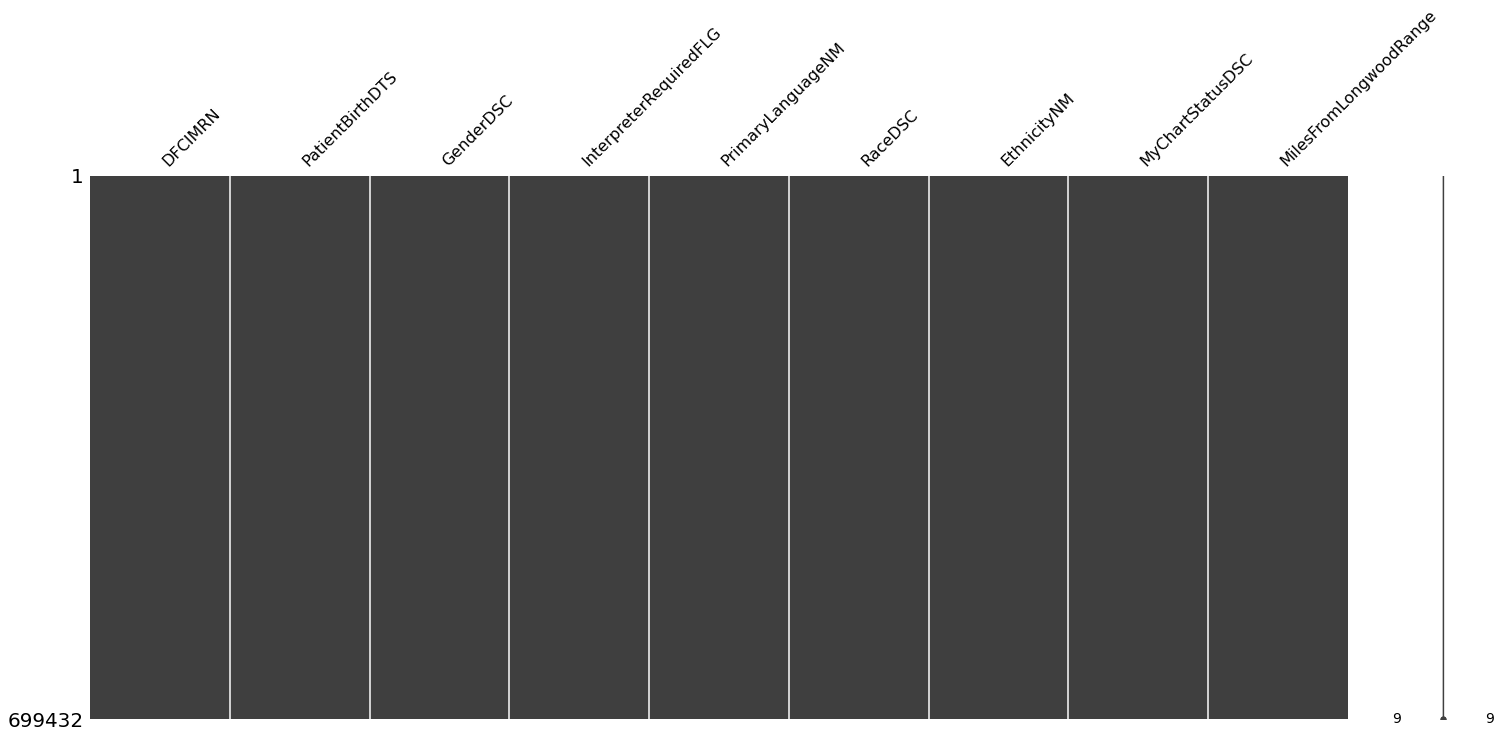

In [ ]:
msno.matrix(data)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699432 entries, 0 to 699431
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   DFCIMRN                 699432 non-null  object
 1   PatientBirthDTS         699432 non-null  int64 
 2   GenderDSC               699432 non-null  object
 3   InterpreterRequiredFLG  699432 non-null  object
 4   PrimaryLanguageNM       699432 non-null  object
 5   RaceDSC                 699432 non-null  object
 6   EthnicityNM             699432 non-null  object
 7   MyChartStatusDSC        699432 non-null  object
 8   MilesFromLongwoodRange  699432 non-null  object
dtypes: int64(1), object(8)
memory usage: 48.0+ MB


In [ ]:
df_model=data.copy()

### **Importing the Questionaire dataset**

Importing the Questionaire dataset

In [ ]:
questionnaire= pd.read_csv('/content/drive/Shareddrives/Capstone-B6/Dataset/Data Cleaned_Questionaire.csv')

Looking at missing values

In [ ]:
questionnaire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 521180 entries, 0 to 521179
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Unnamed: 0                  521180 non-null  int64  
 1   DFCIMRN                     521180 non-null  object 
 2   RootQuestionnaireID         521180 non-null  int64  
 3   RootQuestionnaireNM         521180 non-null  object 
 4   RootAnswerID                357405 non-null  object 
 5   FinalEncounterDTSRank       521180 non-null  int64  
 6   QuestionID                  356529 non-null  float64
 7   QuestionTXT                 356529 non-null  object 
 8   AnswerTXT                   351220 non-null  object 
 9   AnswerMethodDSC             356314 non-null  object 
 10  RootQuestionnaireStatusDSC  521180 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 43.7+ MB


Merging the questionnaire and demographic datasets

In [ ]:
df = pd.merge(data, questionnaire,on='DFCIMRN')
df

,DFCIMRN,PatientBirthDTS,GenderDSC,InterpreterRequiredFLG,PrimaryLanguageNM,RaceDSC,EthnicityNM,MyChartStatusDSC,MilesFromLongwoodRange,Unnamed: 0,RootQuestionnaireID,RootQuestionnaireNM,RootAnswerID,FinalEncounterDTSRank,QuestionID,QuestionTXT,AnswerTXT,AnswerMethodDSC,RootQuestionnaireStatusDSC
0,0xF357D6D5BAFA16FB147BE4E26B53962308784F2340E5...,1950,Male,Y,Chinese-Cantonese,Asian,Chinese,Activated,06-10 mi,494823,1461111101,ONC DF PATIENT INTAKE SURVEY,NaN,2,NaN,NaN,NaN,NaN,Assigned
1,0xCAB615644AA56EFDA9BBABE00E92F4C8F71217FB7E9B...,1948,Male,N,Declined,Unavailable,Unavailable,Inactivated,11-15 mi,412000,1461111101,ONC DF PATIENT INTAKE SURVEY,NaN,13,NaN,NaN,NaN,NaN,Assigned
2,0xCAB615644AA56EFDA9BBABE00E92F4C8F71217FB7E9B...,1948,Male,N,Declined,Unavailable,Unavailable,Inactivated,11-15 mi,412001,1461111101,ONC DF PATIENT INTAKE SURVEY,NaN,4,NaN,NaN,NaN,NaN,Assigned
3,0xCAB615644AA56EFDA9BBABE00E92F4C8F71217FB7E9B...,1948,Male,N,Declined,Unavailable,Unavailable,Inactivated,11-15 mi,412002,1461111101,ONC DF PATIENT INTAKE SURVEY,NaN,7,NaN,NaN,NaN,NaN,Assigned
4,0xCAB615644AA56EFDA9BBABE00E92F4C8F71217FB7E9B...,1948,Male,N,Declined,Unavailable,Unavailable,Inactivated,11-15 mi,412003,1461111101,ONC DF PATIENT INTAKE SURVEY,NaN,11,NaN,NaN,NaN,NaN,Assigned
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517720,0xAB84CF133515AB70D26BEB2F87F68B0695D7C0E4F854...,1953,Male,N,English,White or Caucasian,Unavailable,Activated,16-20 mi,348323,1461111101,ONC DF PATIENT INTAKE SURVEY,NaN,1,NaN,NaN,NaN,NaN,Assigned
517721,0x8E9F0F92C4956DAB9EFC02F6F2106D2735D0C7A5F148...,1941,Male,N,English,White or Caucasian,American,Activated,06-10 mi,288316,1461111101,ONC DF PATIENT INTAKE SURVEY,NaN,1,NaN,NaN,NaN,NaN,Assigned
517722,0x77E338CFCF83F04C77F4DA4AF5EF38E0BA894932A516...,1950,Male,N,English,White or Caucasian,American,Inactivated,60+ mi,242535,1461111101,ONC DF PATIENT INTAKE SURVEY,NaN,1,NaN,NaN,NaN,NaN,Assigned
517723,0xF172E636D34BB9D3C9D845E6D83565F72F8AAFD7EA59...,1944,Female,N,English,White or Caucasian,American,Inactivated,21-25 mi,490894,1461111101,ONC DF PATIENT INTAKE SURVEY,NaN,2,NaN,NaN,NaN,NaN,Assigned


Looking at the missing values

In [ ]:
df.isna().sum()

DFCIMRN                            0
PatientBirthDTS                    0
GenderDSC                          0
InterpreterRequiredFLG             0
PrimaryLanguageNM                  0
RaceDSC                            0
EthnicityNM                        0
MyChartStatusDSC                   0
MilesFromLongwoodRange             0
Unnamed: 0                         0
RootQuestionnaireID                0
RootQuestionnaireNM                0
RootAnswerID                  163514
FinalEncounterDTSRank              0
QuestionID                    164375
QuestionTXT                   164375
AnswerTXT                     169632
AnswerMethodDSC               164590
RootQuestionnaireStatusDSC         0
dtype: int64

Dropping the missing values

In [ ]:
df=df.dropna()

This shows that there isn't any missing values

In [ ]:
df.isna().sum()

DFCIMRN                       0
PatientBirthDTS               0
GenderDSC                     0
InterpreterRequiredFLG        0
PrimaryLanguageNM             0
RaceDSC                       0
EthnicityNM                   0
MyChartStatusDSC              0
MilesFromLongwoodRange        0
Unnamed: 0                    0
RootQuestionnaireID           0
RootQuestionnaireNM           0
RootAnswerID                  0
FinalEncounterDTSRank         0
QuestionID                    0
QuestionTXT                   0
AnswerTXT                     0
AnswerMethodDSC               0
RootQuestionnaireStatusDSC    0
dtype: int64

Doing some Explorotary Data Analsyis for the questionnaire dataset

In [ ]:
df['QuestionTXT'].value_counts()

Do you currently live alone?                                                                                                                                                                                                         41116
How confident are you filling out medical forms?                                                                                                                                                                                     40657
Did you complete this survey on your own?                                                                                                                                                                                            40409
How confident are you in understanding medical statistics?                                                                                                                                                                           40079
How difficult is it for you (your family) to meet monthly pa

In [ ]:
df['RootQuestionnaireStatusDSC'].value_counts()

Completed              331408
Reviewable              11044
Incomplete               3455
Started in facility      1979
Name: RootQuestionnaireStatusDSC, dtype: int64

In [ ]:
df['MyChartStatusDSC'].value_counts()

Activated                                  277222
Inactivated                                 33024
Pending Activation                          17989
Unknown                                     11285
Non Standard MyChart Status                  6679
Patient Declined                             1683
Activation Code Generated, but Disabled         4
Name: MyChartStatusDSC, dtype: int64

In [ ]:
df['QuestionID'].value_counts()

1.242590e+05    41116
1.242540e+05    40657
1.242560e+05    40409
1.242550e+05    40079
1.242620e+05    38927
1.400002e+09    35746
1.400002e+09    35680
1.400002e+09    35587
1.400002e+09    35587
1.242570e+05     4098
Name: QuestionID, dtype: int64

In [ ]:
df['AnswerTXT'].value_counts(normalize=True) #Normalizing the counts by representing them as a percentage of the total number

Extremely                     0.104483
Y                             0.104172
No                            0.102094
Very Good                     0.077683
Quite a bit                   0.077485
Not at all difficult          0.060528
Good                          0.054340
Excellent                     0.047007
Somewhat                      0.035744
Not very difficult            0.032925
50.8                          0.021096
Fair                          0.020182
Yes                           0.016094
Somewhat difficult            0.014844
43.5                          0.013364
N                             0.011984
A family member or friend     0.011420
54.1                          0.010072
32.4                          0.009989
48.3                          0.009975
29.6                          0.009874
45.8                          0.009842
A little bit                  0.009463
41.1                          0.008365
57.7                          0.008034
53.3                     

## **Overall EDA: Patients' demographics in general**

###**MyChartStatusDSC**

Looking at the proportion of MyChart Status between patients

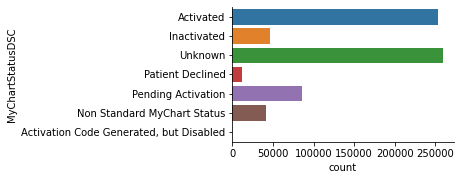

In [ ]:
#Doing a countplot to see the count of patients in different status
ax = sns.catplot(y="MyChartStatusDSC", kind="count", data=data, height=2.6, aspect=2.5)

In [ ]:
data_mychart=data['MyChartStatusDSC'].value_counts()[:5].sort_values(ascending=False)

In [ ]:
data_mychart=pd.DataFrame(data_mychart)
data_mychart.columns=['count']

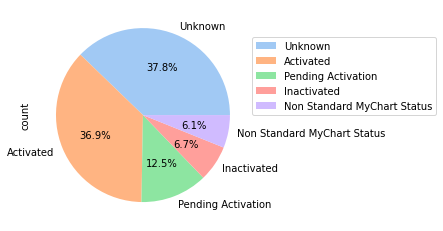

In [ ]:
#Doing a pie plot to see the percentage of patients in different status
labels = data_mychart.index
colors = sns.color_palette('pastel')[0:5]
data_mychart.plot.pie(autopct="%.1f%%",colors=colors,labels=labels,subplots=True)
plt.legend(loc=(1.0,0.5))

###**Gender**

Doing a countplot to see the number of patients from each gender 

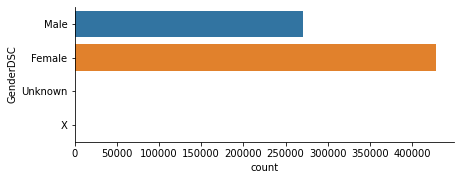

In [ ]:
ax = sns.catplot(y="GenderDSC", kind="count", data=data, height=2.6, aspect=2.5)

###**Birthyear**

Distribution plot for Birthyear

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


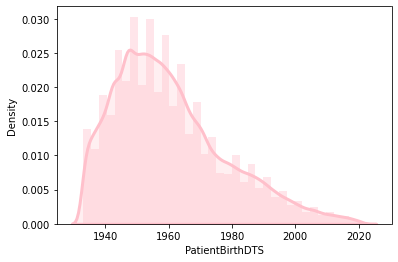

In [ ]:
sns.distplot(data['PatientBirthDTS'], hist=True, kde=True, 
             bins=int(180/5), color = 'pink', 
             kde_kws = {'shade': True, 'linewidth': 3})

###**Age**

Distribution plot for Age

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


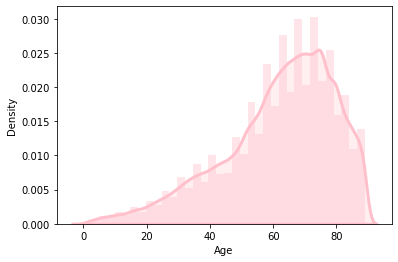

In [ ]:
data['Age'] = 2022 - data['PatientBirthDTS'] #Creating the age variable by subtracting the patients' age from 2022
sns.distplot(data['Age'], hist=True, kde=True, 
             bins=int(180/5), color = 'pink', 
             kde_kws = {'shade': True, 'linewidth': 3})

We can see that the plot inversly matches the birthyear since they are done with age instead.

###**Primary Language**

Looking at the distribution of primary languages between patients

In [ ]:
#Deleting the nulls
data["PrimaryLanguageNM"].replace({"Unavailable": "Unknown"}, inplace=True)
data_lan1=data['PrimaryLanguageNM'].value_counts()[:10].sort_values(ascending=False)
data_lan1=pd.DataFrame(data_lan1)
data_lan1.columns=['count']
data_lan1


,count
English,584426
Unknown,71793
Spanish,20470
Arabic,4938
Portuguese,1783
Russian,1752
Chinese-Mandarin,1440
creole-haitian,1268
DNUPortuguese,1195
Vietnamese,1152


Plotting the distribution

(array([     0., 100000., 200000., 300000., 400000., 500000., 600000.,
        700000.]), <a list of 8 Text major ticklabel objects>)

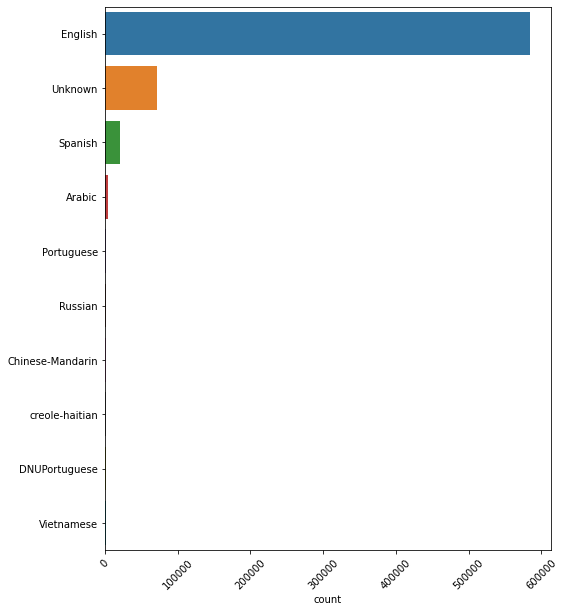

In [ ]:
plt.figure(figsize=(8,10))
sns.barplot(x='count',y=data_lan1.index,data=data_lan1)
plt.xticks(rotation=45)

Let's remove English, Unavailable and Spanish.

In [ ]:
data_lan1.drop(index=['English','Unknown','Spanish'],inplace=True)#Here we are dropping English, Unknown and Spanish

Doing another plot removing the the languages English, Unavailable and Spanish to see the distibution of languages that are less frequent

(array([   0., 1000., 2000., 3000., 4000., 5000., 6000.]),
 <a list of 7 Text major ticklabel objects>)

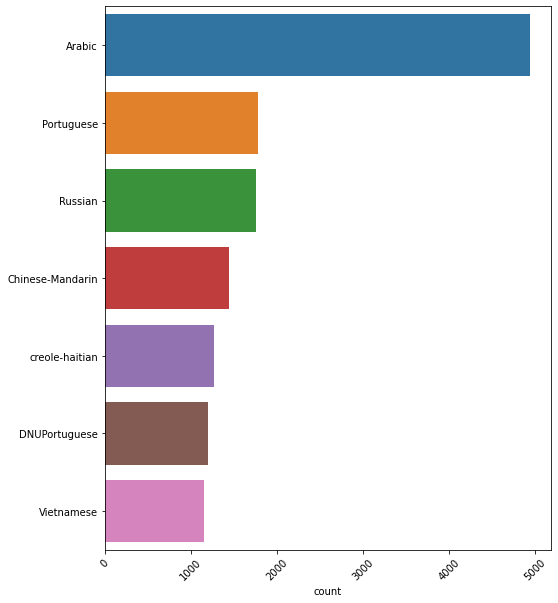

In [ ]:
#Creating the plot
plt.figure(figsize=(8,10))
sns.barplot(x='count',y=data_lan1.index,data=data_lan1)
plt.xticks(rotation=45)

###**Race**

Plotting the top five race counts

In [ ]:
#Deleting the nulls
data_race=data.dropna(axis=0,subset=['RaceDSC'],inplace=False)

Creating a dataframe with the top 5 race counts

In [ ]:
data["RaceDSC"].replace({"White": "White or Caucasian"}, inplace=True)
data_race1=data['RaceDSC'].value_counts()[:5].sort_values(ascending=False)
data_race1=pd.DataFrame(data_race1)
data_race1.columns=['count']

Taking a look at the dataframe we created

In [ ]:
data_race1

,count
White or Caucasian,509224
Unavailable,75108
Black or African American,38006
Other,28083
Asian,20169


Pie-chart of the results

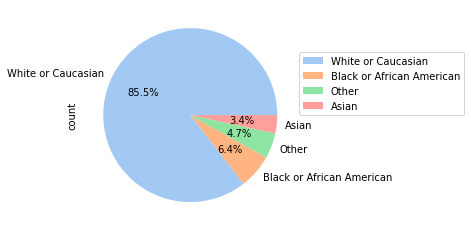

In [ ]:
data_race1.drop(index='Unavailable',inplace=True) #Dropping the 'Unavailable' values for race to find the percentages of the top 5 in terms of count instead
#Creating the plot
labels = data_race1.index
colors = sns.color_palette('pastel')[0:5]
data_race1.plot.pie(autopct="%.1f%%",colors=colors,labels=labels,subplots=True)
plt.legend(loc=(1.0,0.5))

### **Ethnicity**

In [ ]:
data["EthnicityNM"].replace({"Unavailable": "Unknown"}, inplace=True)#Deleting the null values
data_eth=data.dropna(axis=0,subset=['EthnicityNM'],inplace=False)
data_eth1=data_eth['EthnicityNM'].value_counts()[:5].sort_values(ascending=False)#Counting the top 5 values 
data_eth1=pd.DataFrame(data_eth1) #Creating a dataframe of the top five ethnicities in terms of count and the number of patients in them
data_eth1.columns=['count']

Looking at the dataframe we created above

In [ ]:
data_eth1

,count
Unknown,266443
American,253002
Declined,42158
European,17805
African American,13475


Plotting the results

(array([     0.,  50000., 100000., 150000., 200000., 250000., 300000.]),
 <a list of 7 Text major ticklabel objects>)

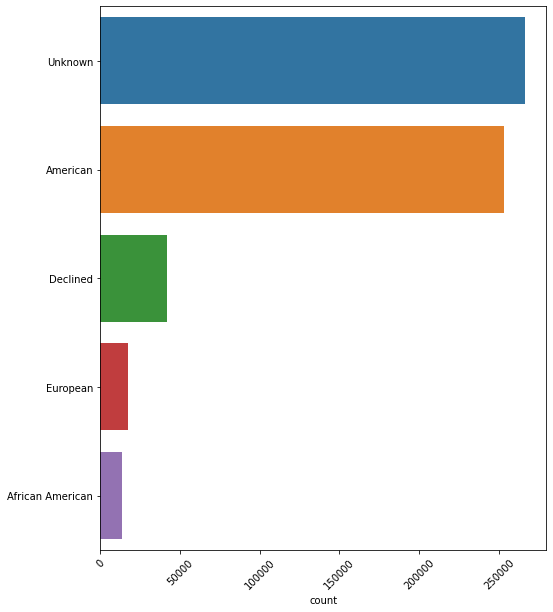

In [ ]:
plt.figure(figsize=(8,10))
sns.barplot(x='count',y=data_eth1.index,data=data_eth1)
plt.xticks(rotation=45)

Peole are not that willing to release the relevant information and the data is less informative in this case.

### **MilesFromLongwoodRange**

In [ ]:
data_mil=data.dropna(axis=0,subset=['MilesFromLongwoodRange'],inplace=False)#Deleting the null values
data_mil1=data_mil['MilesFromLongwoodRange'].value_counts()[:5].sort_values(ascending=False)#Counting the top 5 values 
data_mil1=pd.DataFrame(data_mil1)#Creating a dataframe of the top five miles distance and the number of patients in each range
data_mil1.columns=['count']

Creating the plot

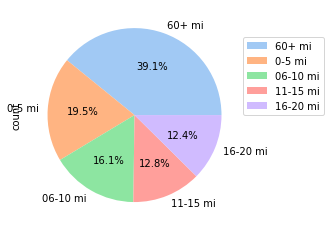

In [ ]:
labels = data_mil1.index
colors = sns.color_palette('pastel')[0:5]
data_mil1.plot.pie(autopct="%.1f%%",colors=colors,labels=labels,subplots=True)
plt.legend(loc=(1.0,0.5))

## **Q1: What are the demographic characteristics of different MyChart status?**

List of the different statuses

In [ ]:
status= data['MyChartStatusDSC'].unique()
status

array(['Activated', 'Inactivated', 'Unknown', 'Patient Declined',
       'Pending Activation', 'Non Standard MyChart Status',
       'Activation Code Generated, but Disabled'], dtype=object)

The list of statuses below will be used for plots that don't have anything to show for the status Activation Code Generated, but Disabled since there isn't much data

In [ ]:
#List of statuses without the status 'Activation Code Generated, but Disabled'
status_subset=['Activated', 'Inactivated', 'Unknown', 'Patient Declined',
       'Pending Activation', 'Non Standard MyChart Status',
       ]

### **Gender distribution**

Plotting the gender distribution for each status

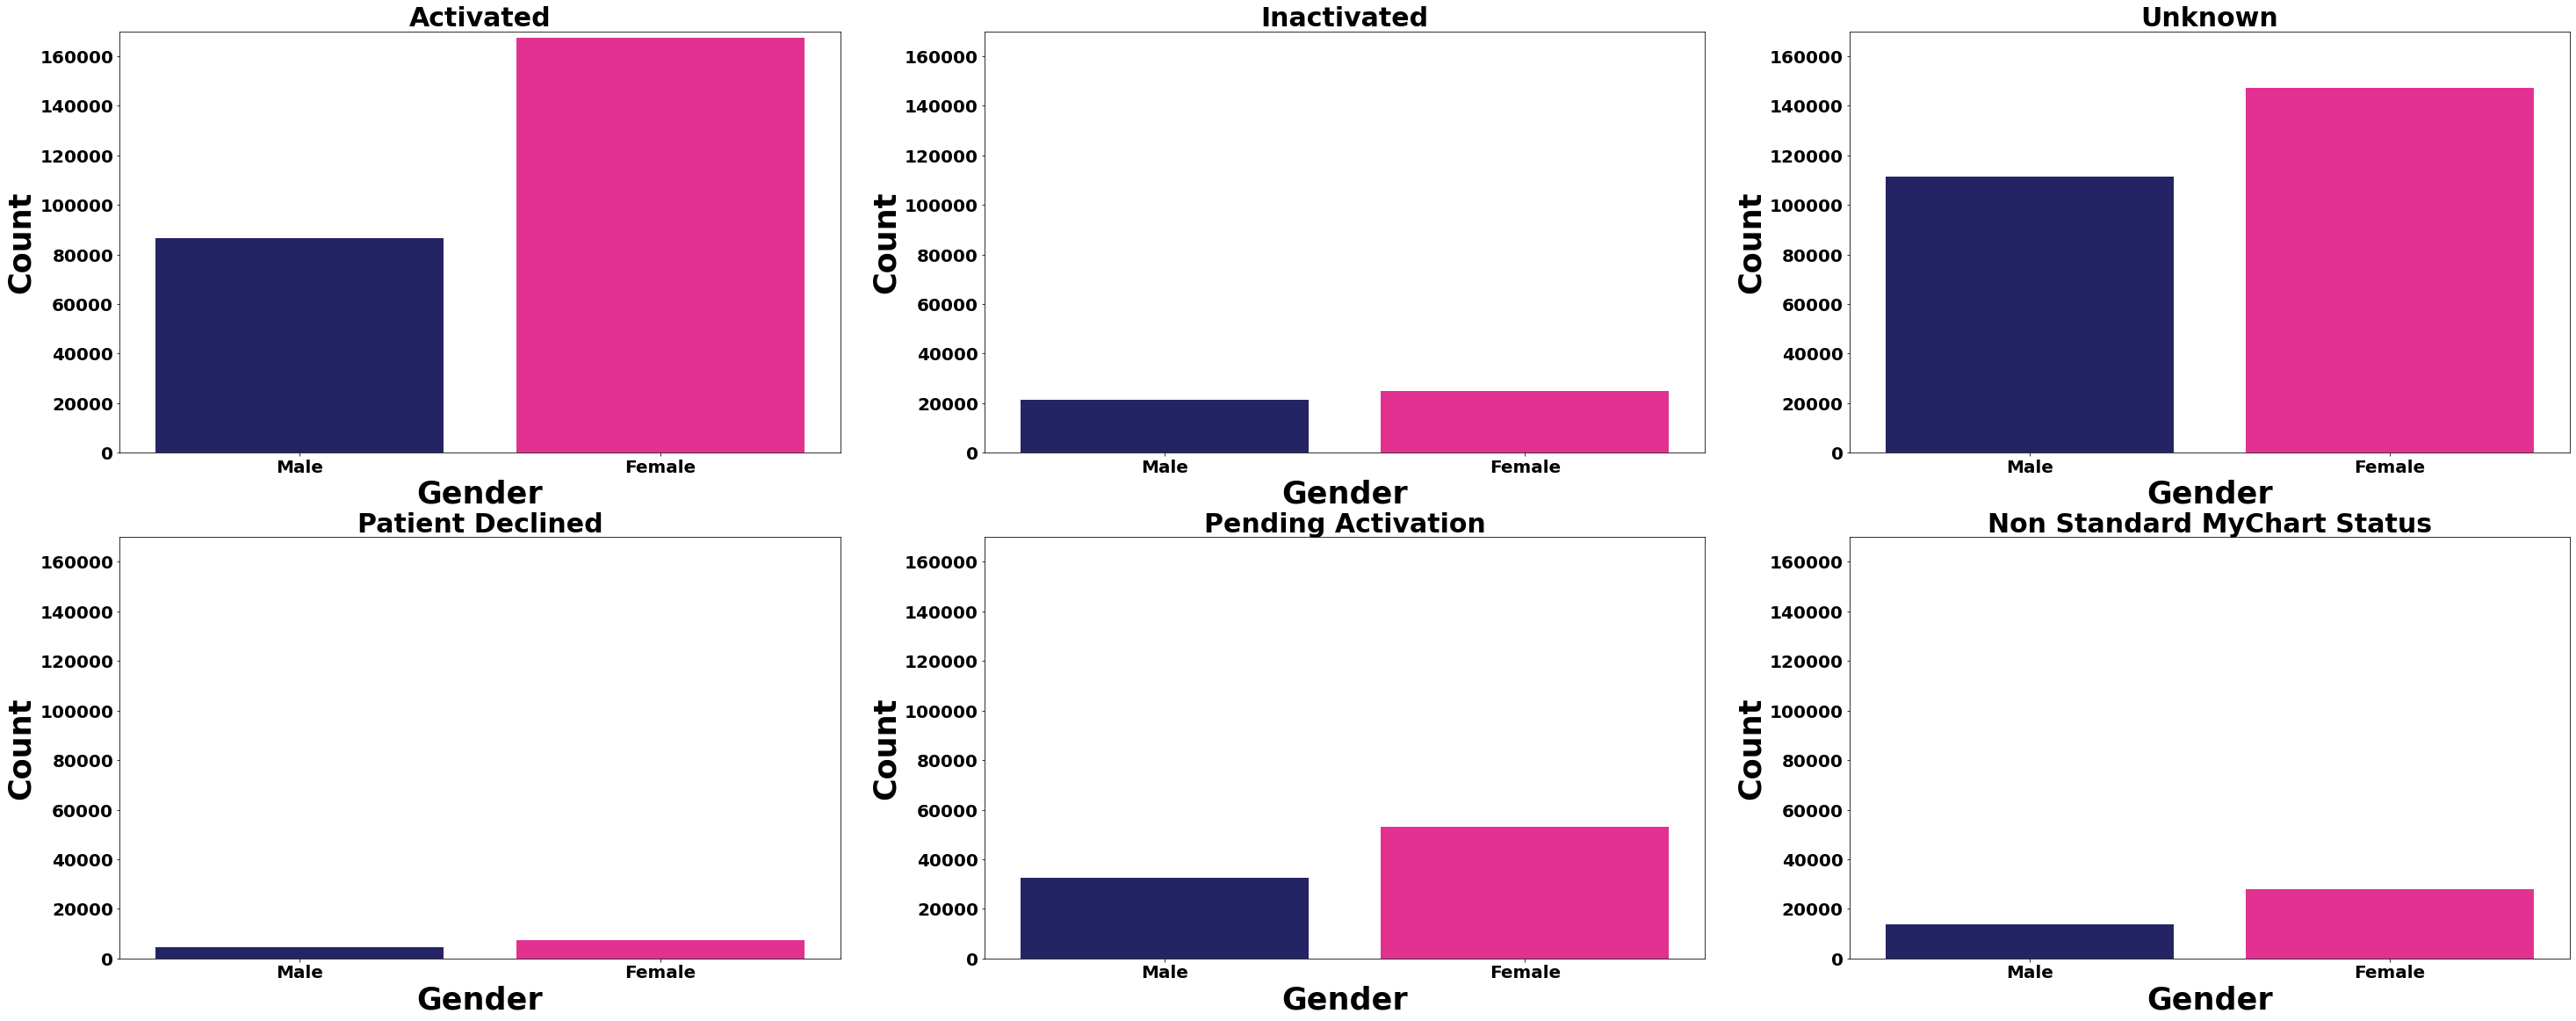

In [ ]:
fig = plt.figure(figsize=(50,30)) #Setting plot dimensions
for i, s in enumerate(status_subset):# Looping through the statuses
  status_1=data[data['MyChartStatusDSC']==s] #Subsetting data based on the status
  plt.subplot(3,3,i+1) #Creating subplots
  plt.ylim(0,170000) #Setting limit for y-axis
  plt.title(s)
  plt.title(s,fontweight="bold",fontsize=30)
  palette = {'Male': "midnightblue", 'Female': "deeppink",'Unknown':"green"  ,'X':"black"} #Defining colors
  sns.countplot(data=status_1,x="GenderDSC",palette=palette,order=['Male','Female'])
  plt.xlabel("Gender",fontweight="bold",fontsize=35)
  plt.ylabel("Count",fontweight="bold",fontsize=35)
  plt.yticks(fontsize=20,fontweight="bold")
  plt.xticks(fontsize=20,fontweight="bold")
  

### **Age distribution**

Plotting the age distribution for each status

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

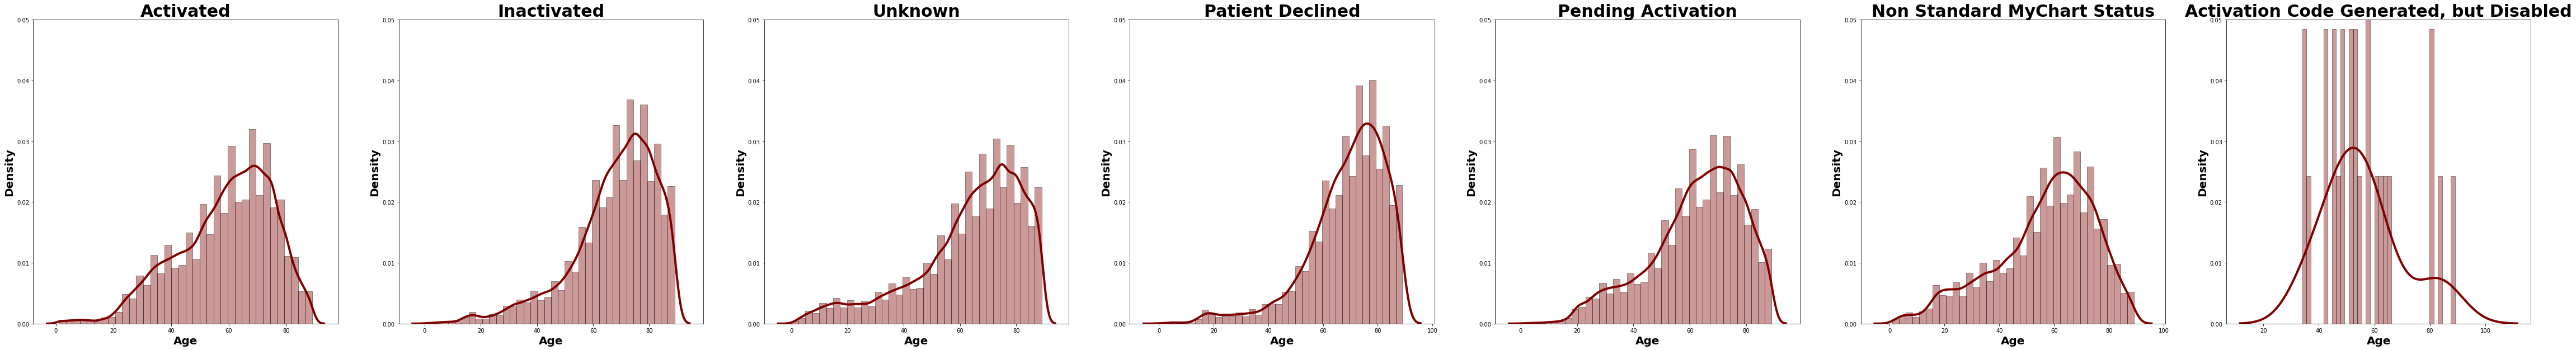

In [ ]:
fig = plt.figure(figsize=(80,10)) #Setting plot dimensions
for i, s in enumerate(status): #Looping through each status
  status_1=data[data['MyChartStatusDSC']==s] #Subsetting the data based on the status
  plt.subplot(1,7,i+1)
  plt.ylim(0, 0.05)
  plt.title(s,fontweight="bold",fontsize=30)
  plt.xlabel("Age",fontweight="bold",fontsize=20)
  plt.ylabel("Density",fontweight="bold",fontsize=20)  
  sns.distplot(status_1['Age'], hist=True,color='maroon', kde=True, 
             bins=int(180/5), 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

### **Age Distribution for patients that are less than 21 years old**

Plotting the distribution for each status, subsetting the data for patients less than 21 years old to see if we can observe any dissimilarities in a closer look, esepcially for younger people

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

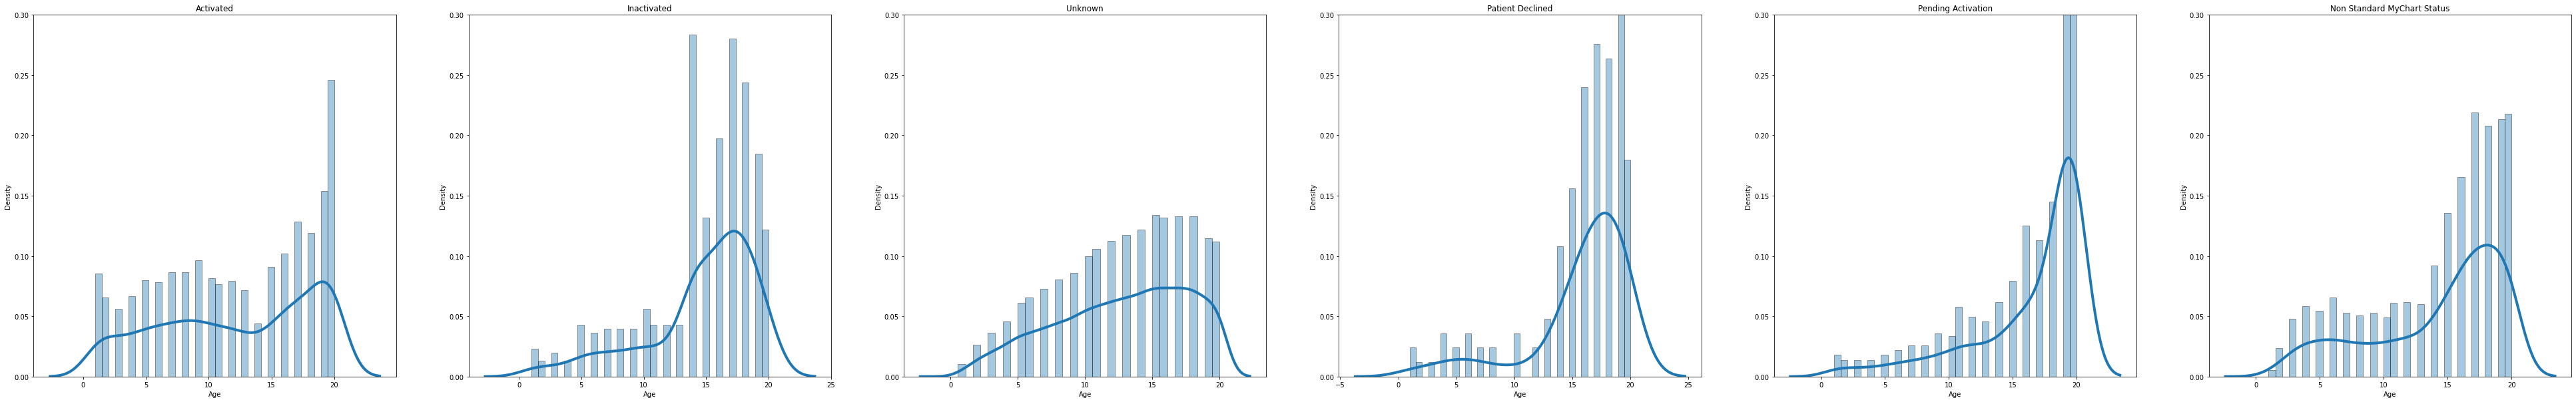

In [ ]:
data_subset_age=data[data['Age']<=20] #Subsetting age
fig = plt.figure(figsize=(80,10)) #Setting plot dimensions
for i, s in enumerate(status_subset): #Looping through each status
  status_1=data_subset_age[data_subset_age['MyChartStatusDSC']==s] #Subsetting the data based on the status
  plt.subplot(1,7,i+1)
  plt.title(s)
  plt.ylim(0, 0.3)
  sns.distplot(status_1['Age'], hist=True, kde=True, 
             bins=int(180/5), 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

### **Age Distribution for patients that are 65 years old or greater**

Plotting the distribution for each status, subsetting the data for patients who are 65 years.Doing so enables us to have a closer look, but this time for people in an older age group

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

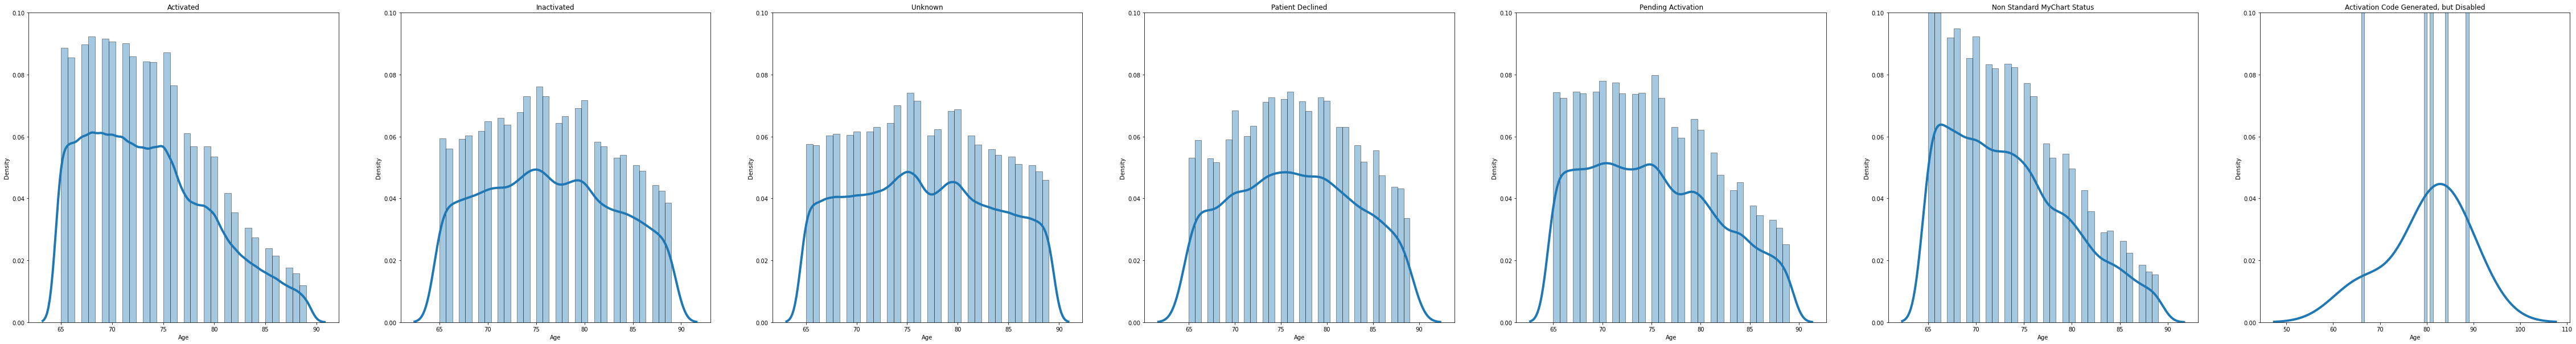

In [ ]:
data_subset_age2=data[data['Age']>=65] #Subsetting age
fig = plt.figure(figsize=(80,10)) #Setting plot dimensions
for i, s in enumerate(status): #Looping through each status
  status_1=data_subset_age2[data_subset_age2['MyChartStatusDSC']==s] #Subsetting the data based on the status
  plt.subplot(1,7,i+1)
  plt.title(s)
  plt.ylim(0, 0.1)
  sns.distplot(status_1['Age'], hist=True, kde=True, 
             bins=int(180/5), 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

### **Race distribution**

Plotting the race distribution of the top 5 largest races in terms of count for each status

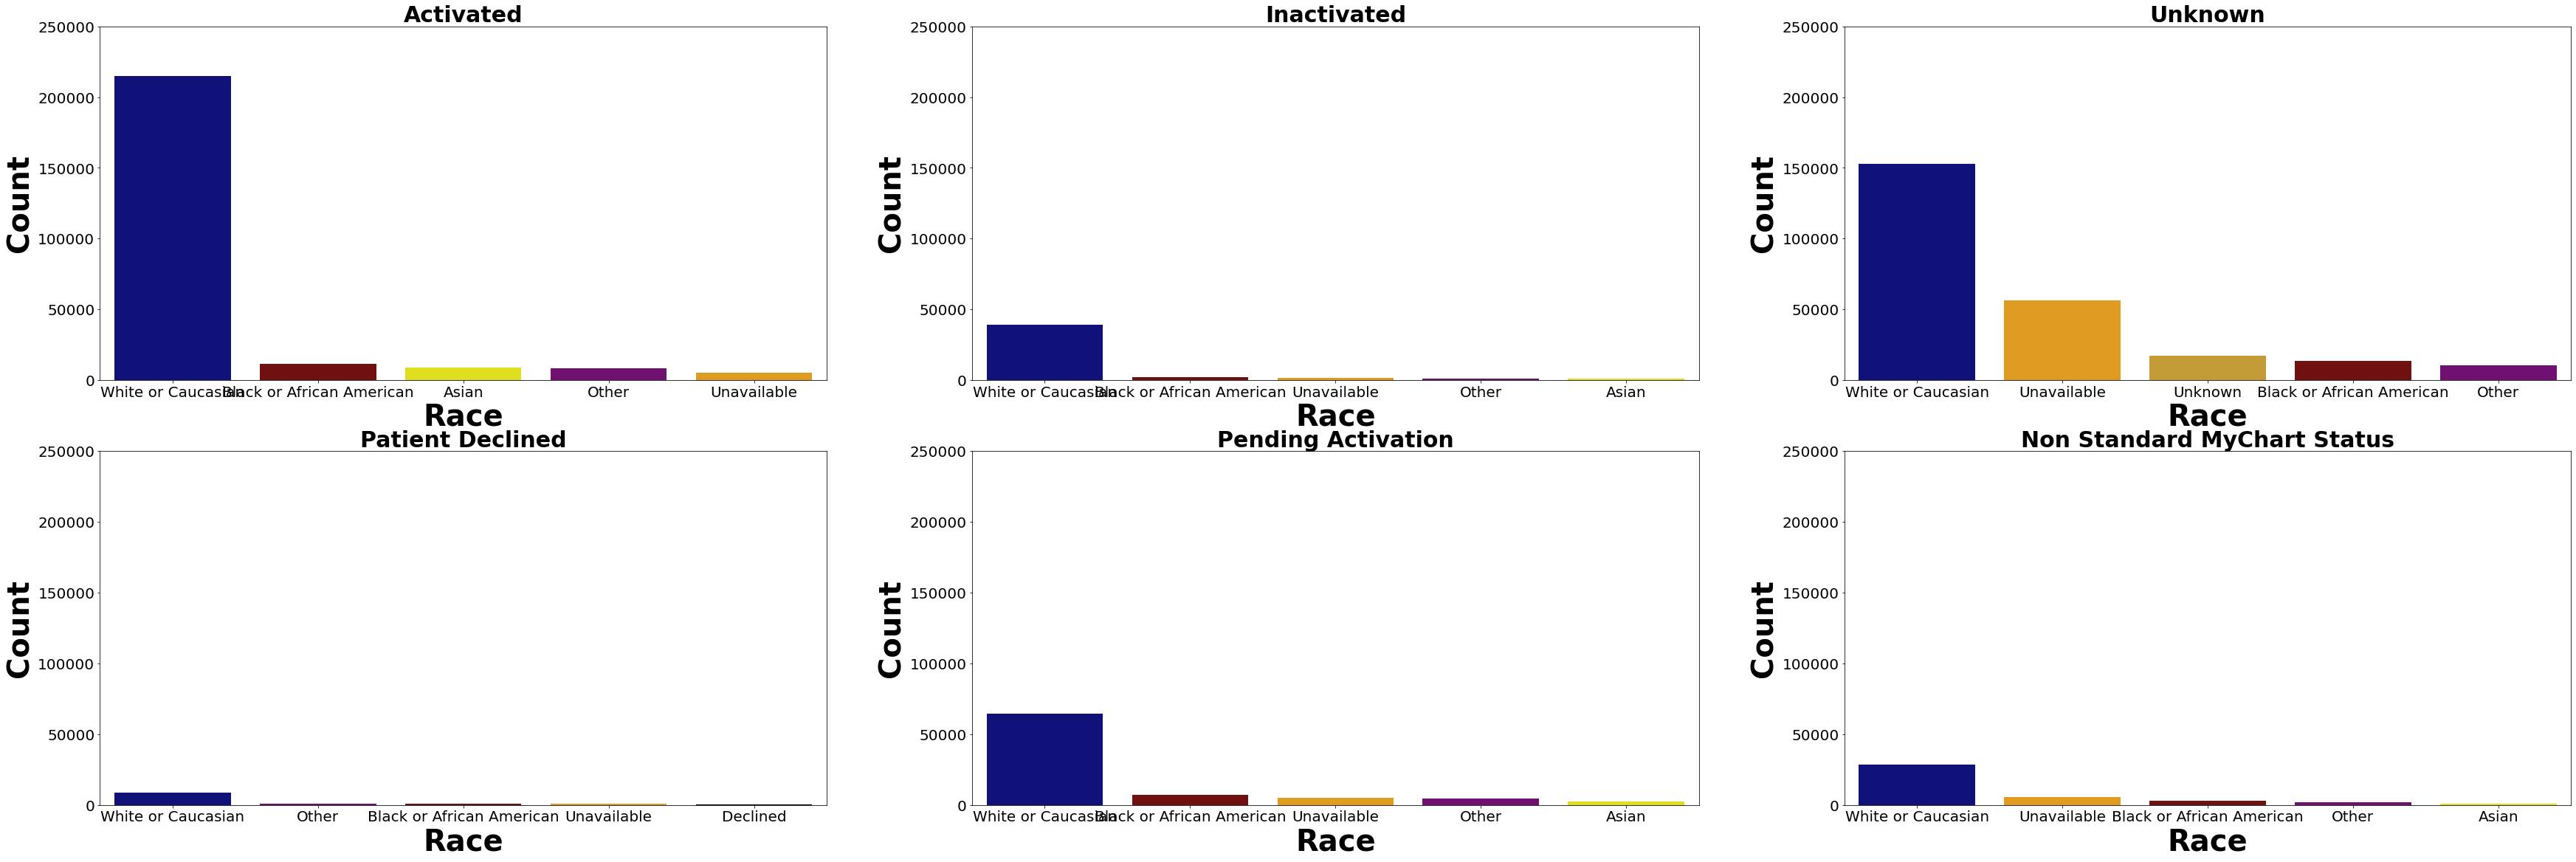

In [ ]:
fig = plt.figure(figsize=(60,30))  #Setting plot dimensions
for i, s in enumerate(status_subset): #Looping through each status
  status_1=data[data['MyChartStatusDSC']==s]  #Subsetting the data based on the status
  plt.subplot(3,3,i+1)
  plt.title(s)
  plt.title(s,fontweight="bold",fontsize=30)
  plt.xlabel("Race",fontweight="bold",fontsize=40)
  plt.ylabel("Count",fontweight="bold",fontsize=40)
  plt.ylim(0, 250000)
  plt.xticks(fontsize=20)
  plt.yticks(fontsize=20)
  palette = {'White or Caucasian': "darkblue", 'White': "darkslateblue",'Black or African American':"maroon"  ,'Asian':"yellow",'Other':"purple",'Unavailable':"orange",'Unknown':"goldenrod",'Declined':"Black"}
  sns.countplot(data=status_1,x='RaceDSC',order=pd.value_counts(status_1['RaceDSC']).iloc[:5].index,palette=palette)
  plt.xlabel("Race",fontweight="bold",fontsize=40)
  plt.ylabel("Count",fontweight="bold",fontsize=40)

### **Ethnicities distribution**

Plotting the distribution of the top 5 largest ethnicities in terms of count for each status

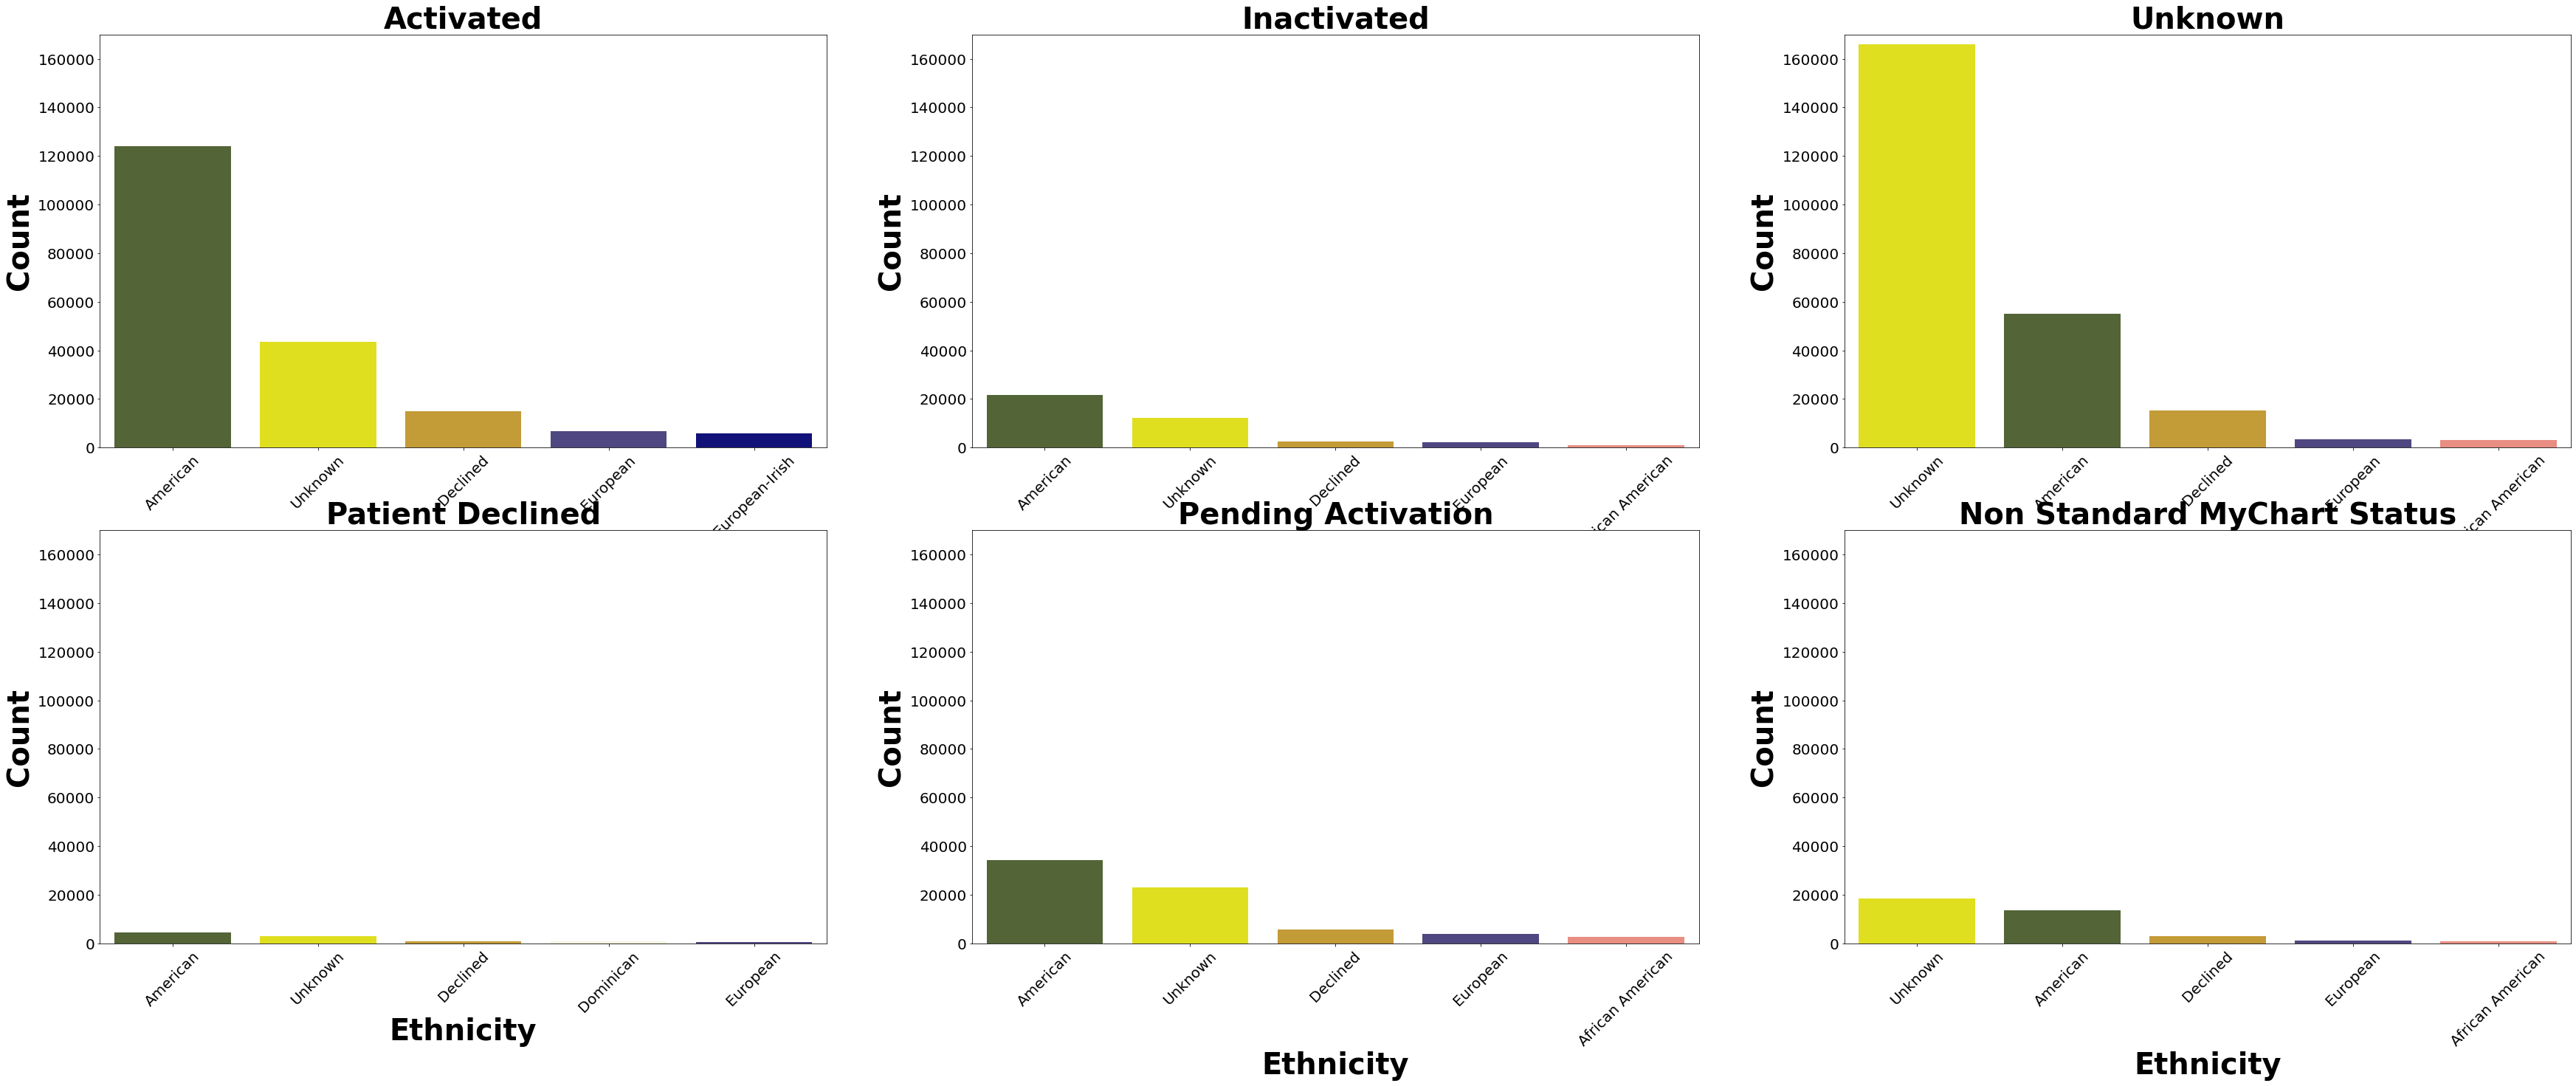

In [ ]:
fig = plt.figure(figsize=(60,35))
for i, s in enumerate(status_subset): #Looping through each status
  status_1=data[data['MyChartStatusDSC']==s] #Subsetting the data based on the status
  plt.subplot(3,3,i+1)
  plt.title(s)
  plt.ylim(0, 170000)
  plt.title(s,fontweight="bold",fontsize=40)
  plt.xlabel("Ethnicity",fontweight="bold",fontsize=40)
  plt.ylabel("Count",fontweight="bold",fontsize=40)
  plt.xticks(fontsize=20,rotation=45)
  plt.yticks(fontsize=20)
  palette = {'African American': "salmon",'Dominican': "beige",'American': "darkolivegreen",'European-Irish': "darkblue", 'European': "darkslateblue",'Middle Eastern-Lebanese':"maroon"  ,'Unknown':"yellow",'Other':"purple",'Unavailable':"orange",'Declined':"goldenrod"}
  sns.countplot(data=status_1,x='EthnicityNM',order=pd.value_counts(status_1['EthnicityNM']).iloc[:5].index,palette=palette)
  plt.xlabel("Ethnicity",fontweight="bold",fontsize=40)
  plt.ylabel("Count",fontweight="bold",fontsize=40)

### **Top 5 primary languages for each status**

Plotting the top 5 primary languages in terms of count for each status

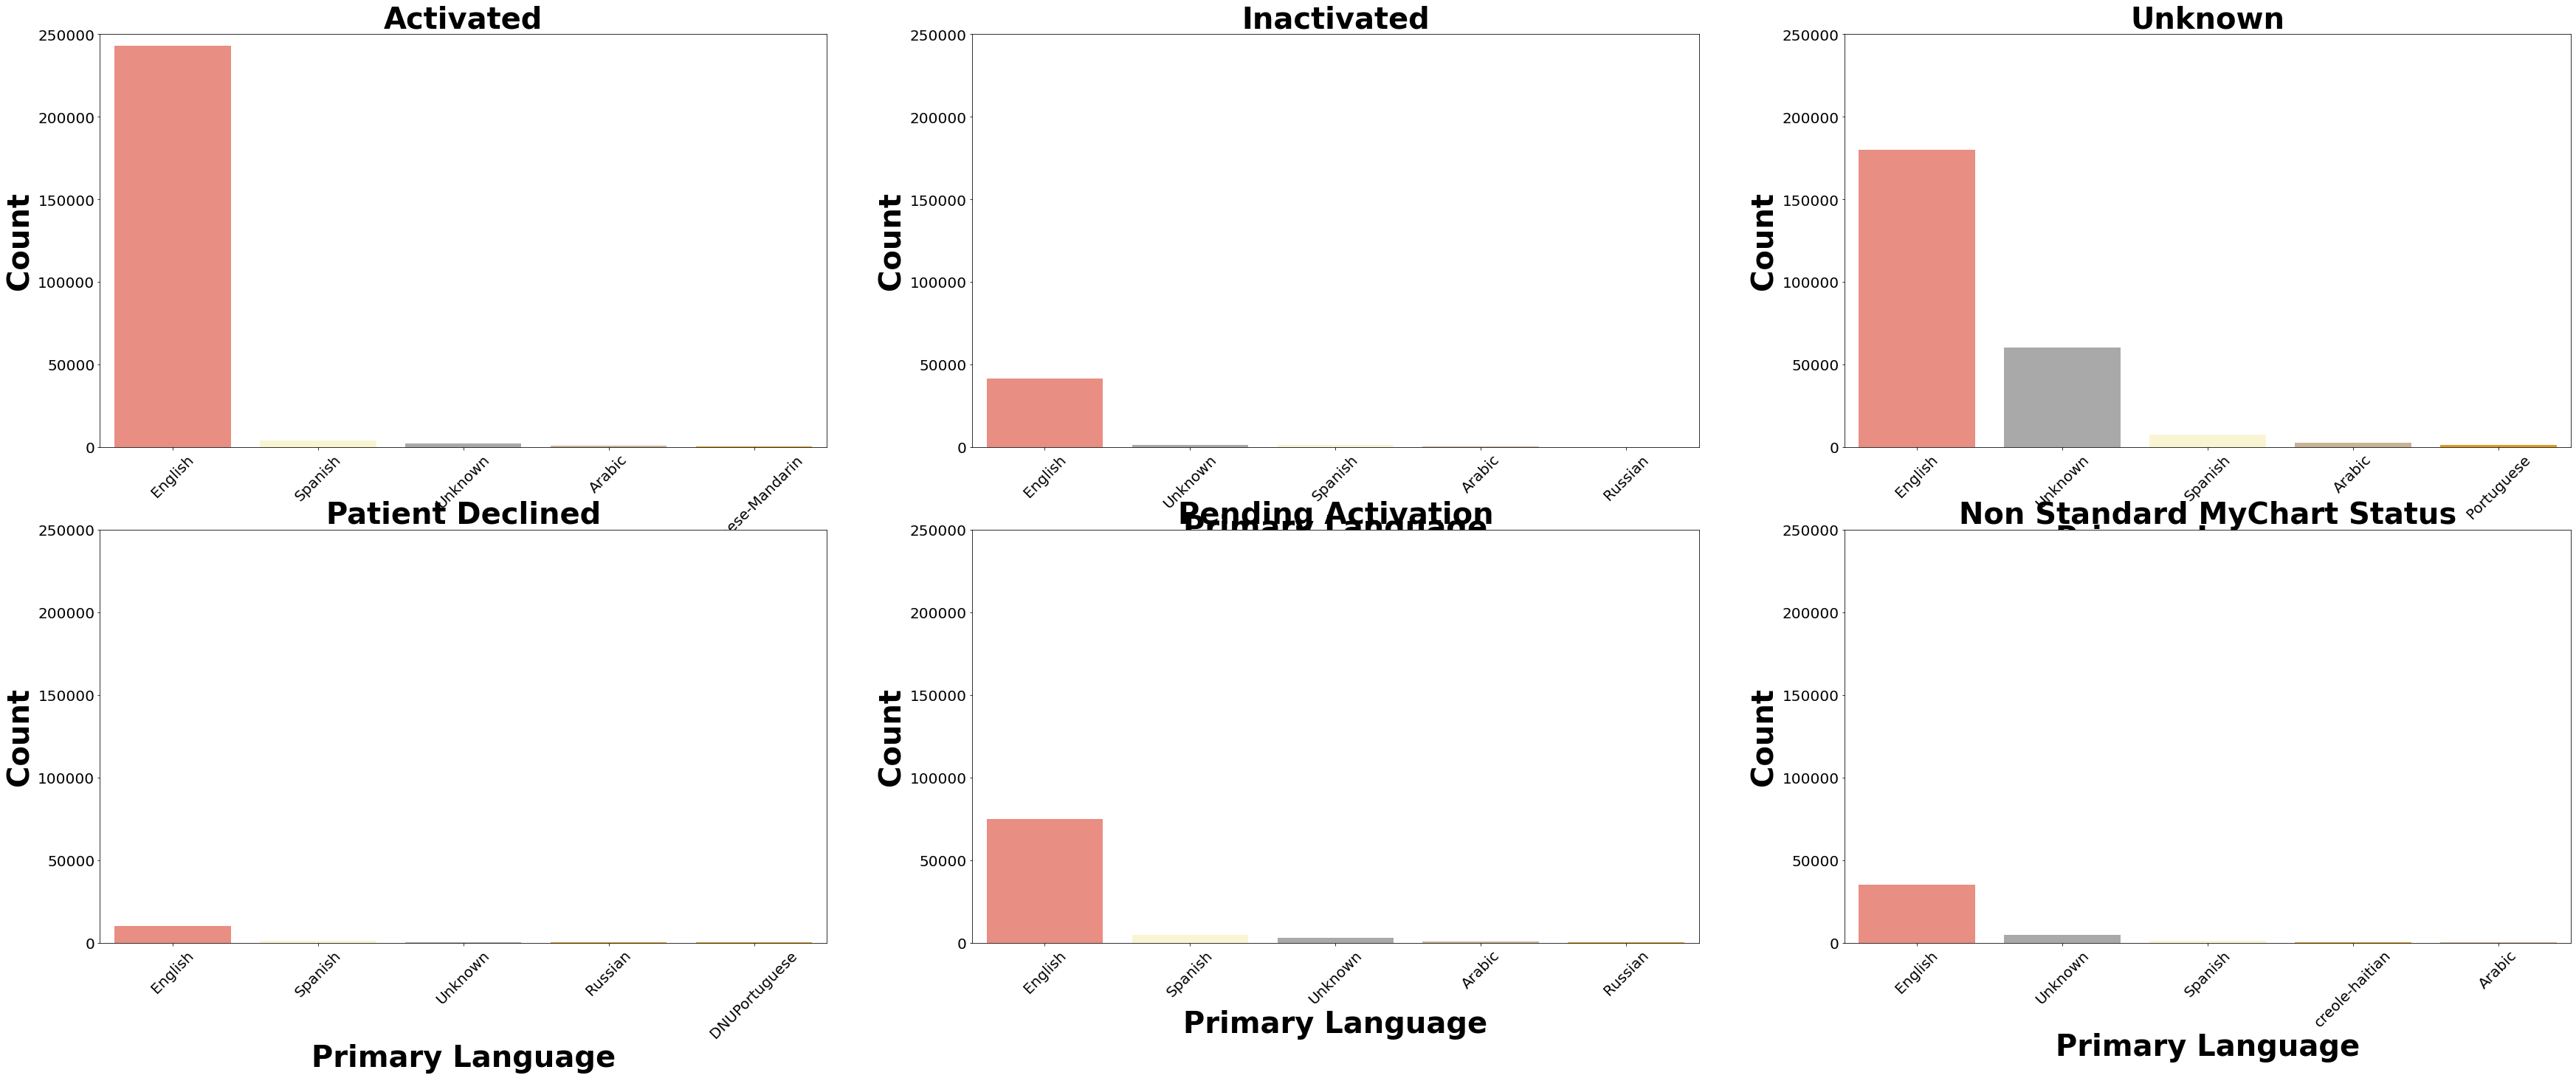

In [ ]:
fig = plt.figure(figsize=(60,35))
for i, s in enumerate(status_subset): #Looping through each status
  status_1=data[data['MyChartStatusDSC']==s] #Subsetting the data based on the status
  plt.subplot(3,3,i+1)
  plt.title(s)
  plt.ylim(0, 250000)
  plt.title(s,fontweight="bold",fontsize=40)
  plt.xlabel("Primary Language",fontweight="bold",fontsize=40)
  plt.ylabel("Count",fontweight="bold",fontsize=40)
  plt.xticks(fontsize=20,rotation=45)
  plt.yticks(fontsize=20)
  palette = {'English':'Salmon','Spanish':'lemonchiffon','Unknown':'darkgrey','Arabic':'tan','Chinese-Mandarin':'orange','Russian':'orange','Portuguese':'orange','DNUPortuguese':'orange','creole-haitian':'orange','Unavailable':'orange'}
  sns.countplot(data=status_1,x='PrimaryLanguageNM',order=pd.value_counts(status_1['PrimaryLanguageNM']).iloc[:5].index,palette=palette)
  plt.xlabel("Primary Language",fontweight="bold",fontsize=40)
  plt.ylabel("Count",fontweight="bold",fontsize=40)
  plt.savefig('Primarylanguage.png')

### **Top 5  distances of the permanent location from Longwood for each status**

Plotting a  pie chart for each status of the distribution of the ranges in miles containing distances of where patients live relative to the clinic

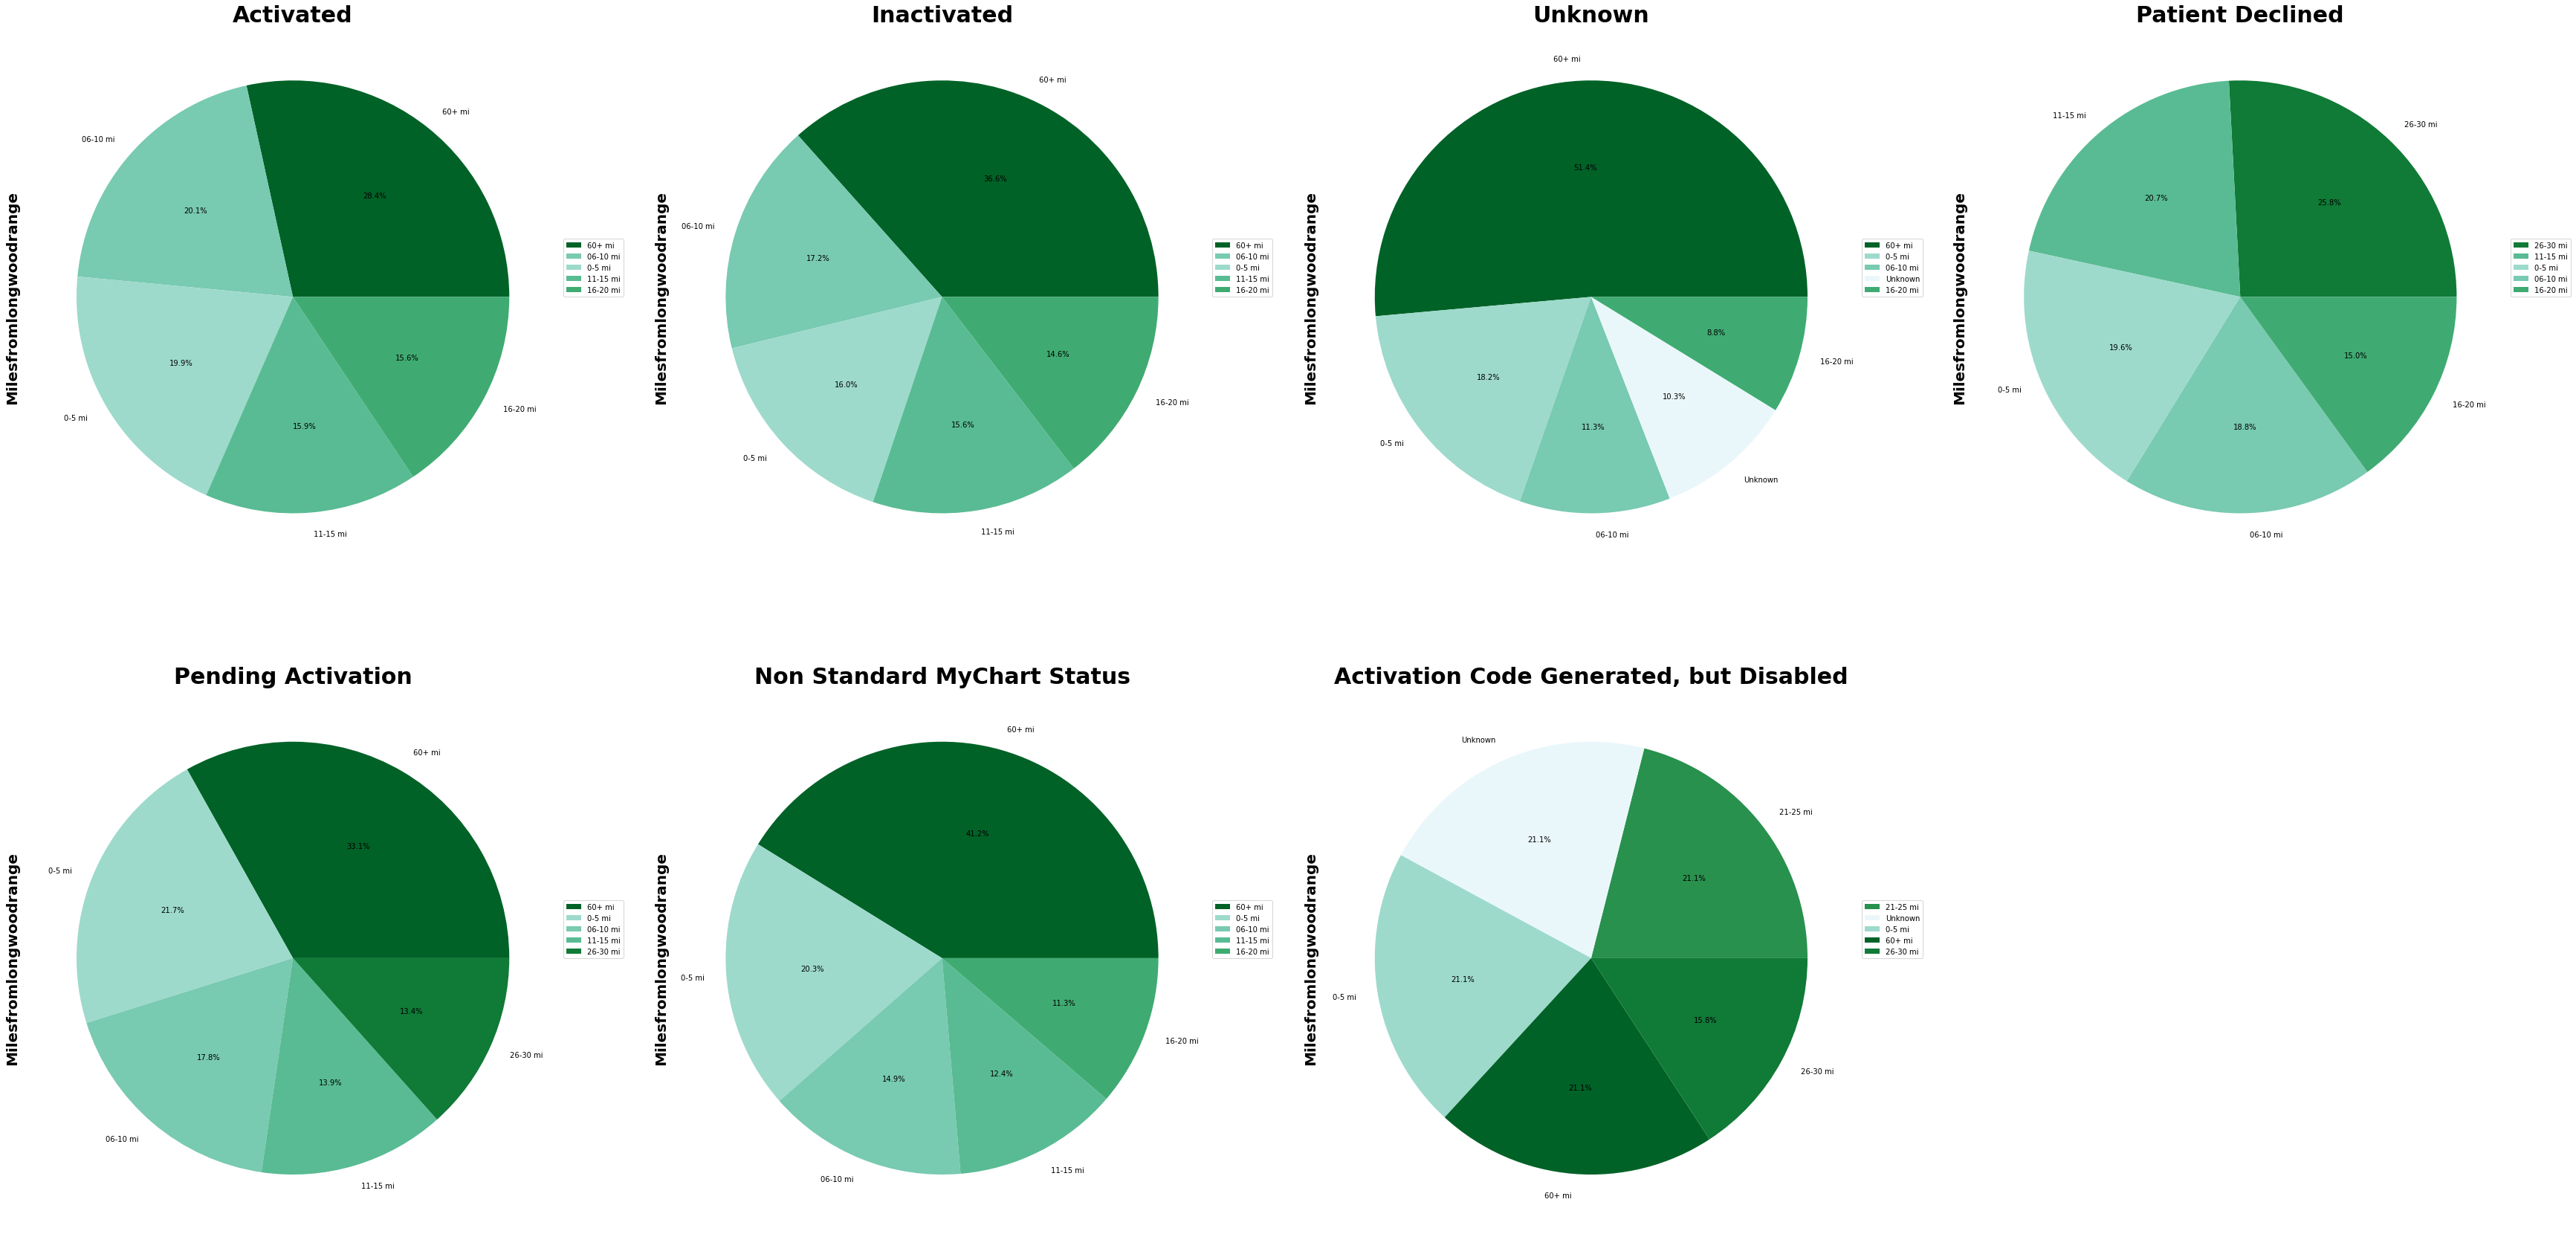

In [ ]:
sequential_colors = sns.color_palette("BuGn", 10)#Defining the sequential colors for the pie charts
fig = plt.figure(figsize=(60,30))
for i, s in enumerate(status): #Looping through each status

  status_1=data[data['MyChartStatusDSC']==s] #Subsetting the data based on the status
  data_mil1=status_1['MilesFromLongwoodRange'].value_counts()[:5].sort_values(ascending=False)
  labels = data_mil1.index
  colors = sns.color_palette('pastel')[0:5]
  plt.subplot(2,4,i+1)
  palette = {'60+ mi': sequential_colors[9],'06-10 mi': sequential_colors[4],'0-5 mi': sequential_colors[3],'11-15 mi': sequential_colors[5], '16-20 mi': sequential_colors[6],'26-30 mi':sequential_colors[8],'21-25 mi':sequential_colors[7],'Unknown':sequential_colors[0]}
  data_mil1.plot.pie(autopct="%.1f%%",colors=[palette[v] for v in data_mil1.keys()],labels=labels,subplots=True)
  plt.legend(loc=(1.0,0.5)) 
  plt.title(s)
  plt.title(s,fontweight="bold",fontsize=30)
  plt.ylabel("Milesfromlongwoodrange",fontweight="bold",fontsize=20)
  plt.savefig('Milesfromlongwoodrange.png')


## **Q2:Do patients' questionnaire answers affect patients' MyChart status?**

For this question, we decided to turn all different MyChart Status into just 2 : Activated and Inactivated.

In [ ]:
df['BinaryStatus'] = np.where(df['MyChartStatusDSC']=='Activated', 'Activated', 'Inactivated')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### **Comparing the responses of patients with an active status to those with an inactive status**

In this section, we are comparing the responses of people with an active status to those with an inactive status

#### **In general, how would you rate your satisfaction with your social activities and relationships?**

Subsetting the question by the question id

In [ ]:
social = df[(df['QuestionID'] == 1400001772)]
status_social=['Activated','Inactivated']

In [ ]:
social['QuestionTXT'].unique()

array(['In general, how would you rate your satisfaction with your social activities and relationships?'],
      dtype=object)

Plotting the percentage of responses for the active and inactive status

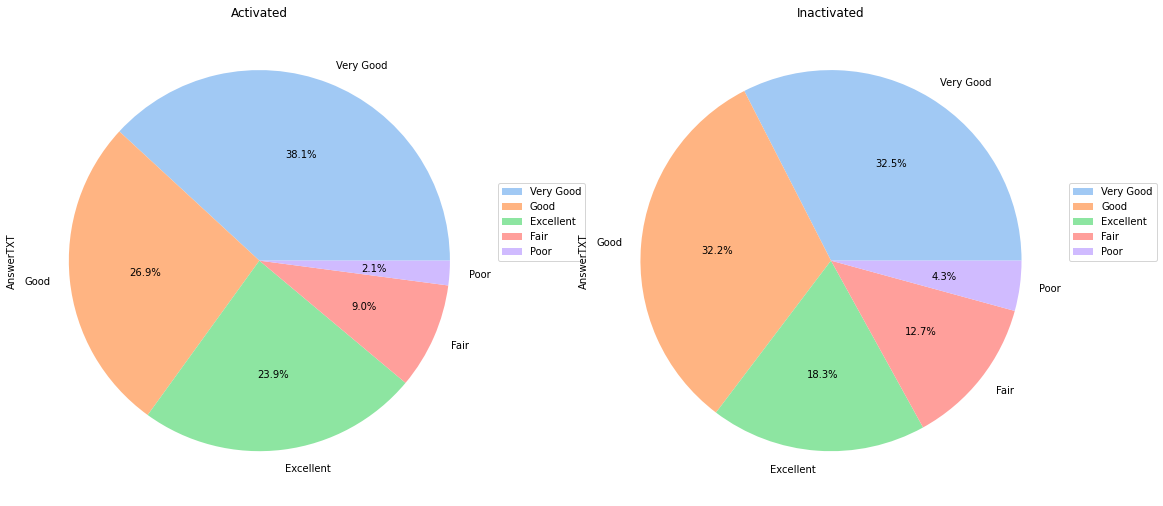

In [ ]:
fig = plt.figure(figsize=(70,20))
for i, s in enumerate(status_social):

  status_1=social[social['BinaryStatus']==s]
  data_social=status_1['AnswerTXT'].value_counts()[:5].sort_values(ascending=False)
  labels = data_social.index
  colors = sns.color_palette('pastel')[0:5]
  plt.subplot(1,7,i+1)
  data_social.plot.pie(autopct="%.1f%%",colors=colors,labels=labels,subplots=True)
  plt.legend(loc=(1.0,0.5)) 
  plt.title(s)

#### **How difficult is it for you (your family) to meet monthly payments on your (family's) bills?**

Subsetting the question by the question id

In [ ]:
financial = df[(df['QuestionID'] == 124262)]
status_financial=['Activated', 'Inactivated']

Plotting the percentage of responses for the active and inactive status

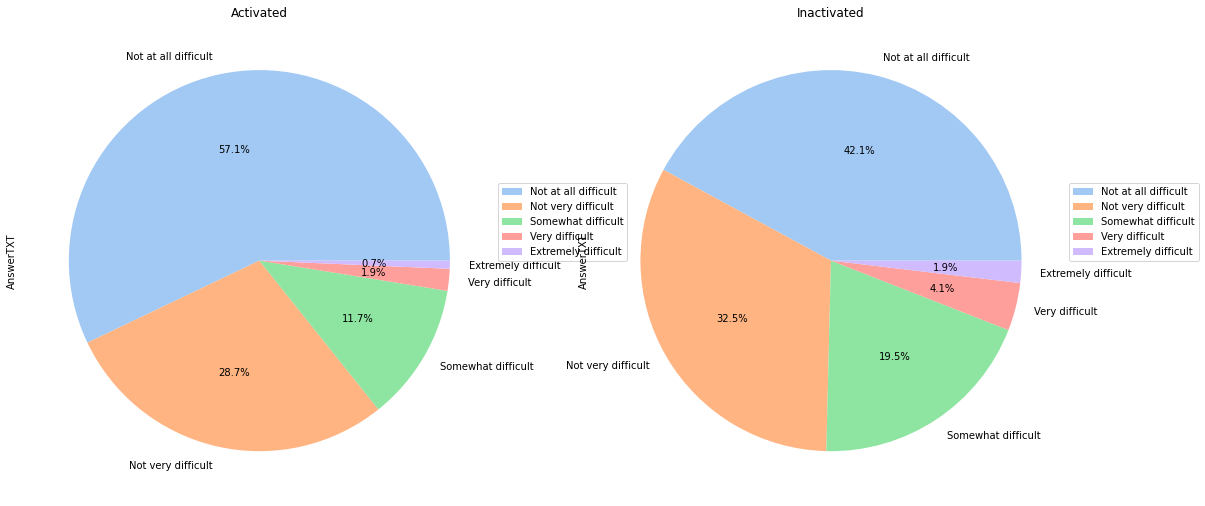

In [ ]:
fig = plt.figure(figsize=(70,20))
for i, s in enumerate(status_financial):

  status_1=financial[financial['BinaryStatus']==s]
  data_financial=status_1['AnswerTXT'].value_counts()[:5].sort_values(ascending=False)
  labels = data_financial.index
  colors = sns.color_palette('pastel')[0:5]
  plt.subplot(1,7,i+1)
  data_financial.plot.pie(autopct="%.1f%%",colors=colors,labels=labels,subplots=True)
  plt.legend(loc=(1.0,0.5)) 
  plt.title(s)

#### **Did you complete this survey on your own?**

Subsetting the question by the question id

In [ ]:
formfilling = df[(df['QuestionID'] == 124256)]
status_formfilling=['Activated', 'Inactivated']

Plotting the percentage of responses for the active and inactive status

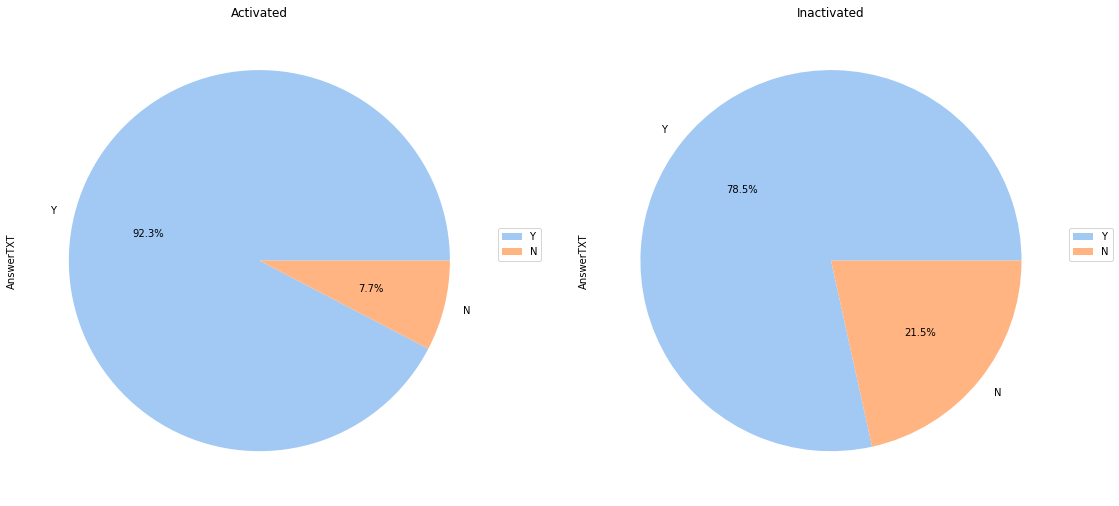

In [ ]:
fig = plt.figure(figsize=(70,20))
for i, s in enumerate(status_social):

  status_1=formfilling[formfilling['BinaryStatus']==s]
  data_formfilling=status_1['AnswerTXT'].value_counts()[:5].sort_values(ascending=False)
  labels = data_formfilling.index
  colors = sns.color_palette('pastel')[0:5]
  plt.subplot(1,7,i+1)
  data_formfilling.plot.pie(autopct="%.1f%%",colors=colors,labels=labels,subplots=True)
  plt.legend(loc=(1.0,0.5)) 
  plt.title(s)

#### **Do you currently live alone?**

Subsetting the question by the question id

In [ ]:
living = df[df['QuestionID'] == 124259]
status_living=['Activated', 'Inactivated']

Plotting the percentage of responses for the active and inactive status

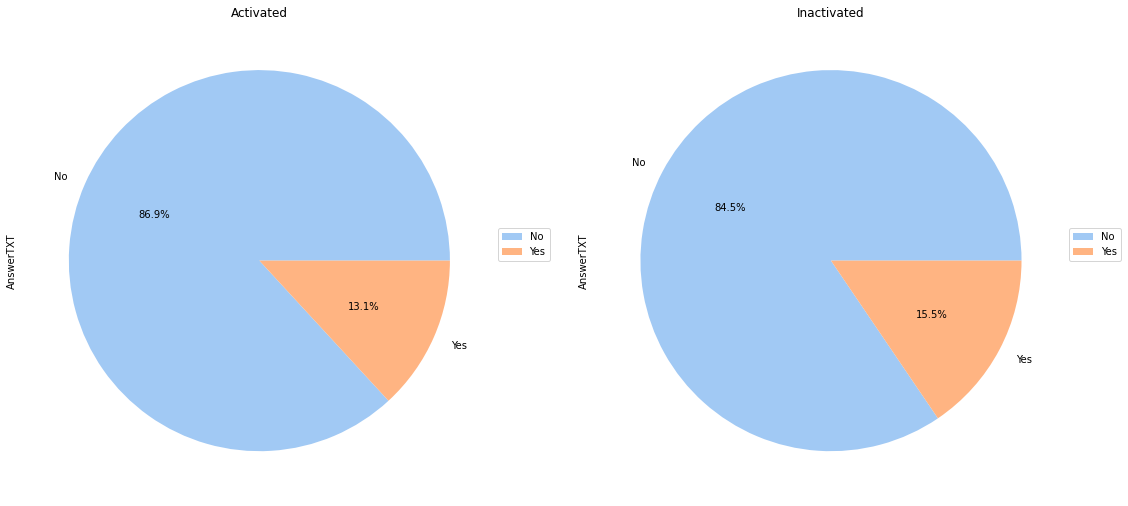

In [ ]:
fig = plt.figure(figsize=(70,20))
for i, s in enumerate(status_social):

  status_1=living[living['BinaryStatus']==s]
  data_living=status_1['AnswerTXT'].value_counts()[:5].sort_values(ascending=False)
  labels = data_living.index
  colors = sns.color_palette('pastel')[0:5]
  plt.subplot(1,7,i+1)
  data_living.plot.pie(autopct="%.1f%%",colors=colors,labels=labels,subplots=True)
  plt.legend(loc=(1.0,0.5)) 
  plt.title(s)

#### **How confident are you in understanding medical statistics?**

Subsetting the question by the question id

In [ ]:
medicalstats = df[df['QuestionID'] == 124255]
status_medicalstats=['Activated', 'Inactivated']

Plotting the percentage of responses for the active and inactive status

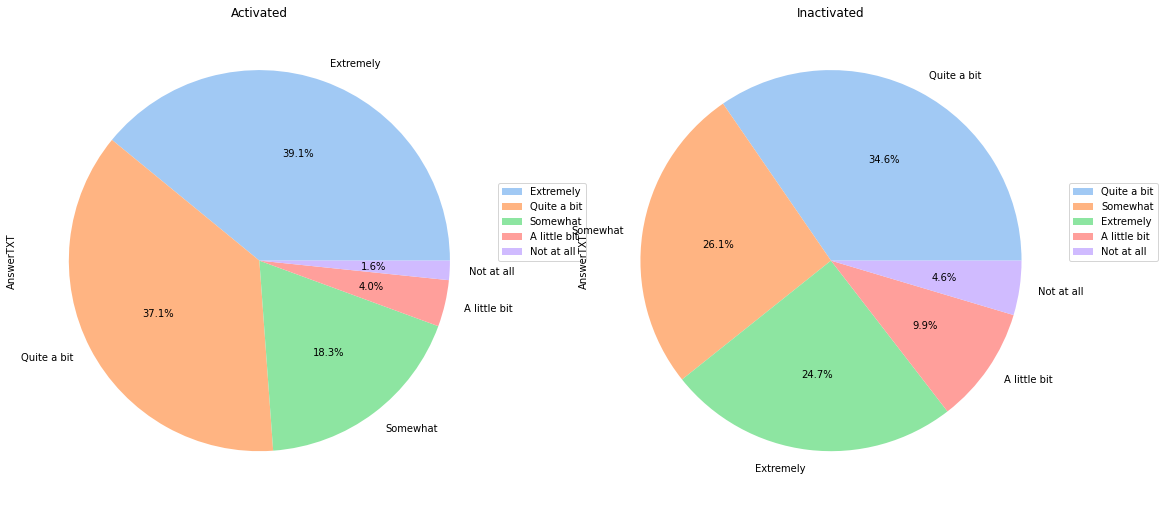

In [ ]:
fig = plt.figure(figsize=(70,20))
for i, s in enumerate(status_social):

  status_1=medicalstats[medicalstats['BinaryStatus']==s]
  data_medicalstats=status_1['AnswerTXT'].value_counts()[:5].sort_values(ascending=False)
  labels = data_medicalstats.index
  colors = sns.color_palette('pastel')[0:5]
  plt.subplot(1,7,i+1)
  data_medicalstats.plot.pie(autopct="%.1f%%",colors=colors,labels=labels,subplots=True)
  plt.legend(loc=(1.0,0.5)) 
  plt.title(s)

#### **How confident are you filling out medical forms?**

Subsetting the question by the question id

In [ ]:
fillingforms = df[df['QuestionID'] == 124254]
status_fillingforms=['Activated', 'Inactivated']

Plotting the percentage of responses for the active and inactive status

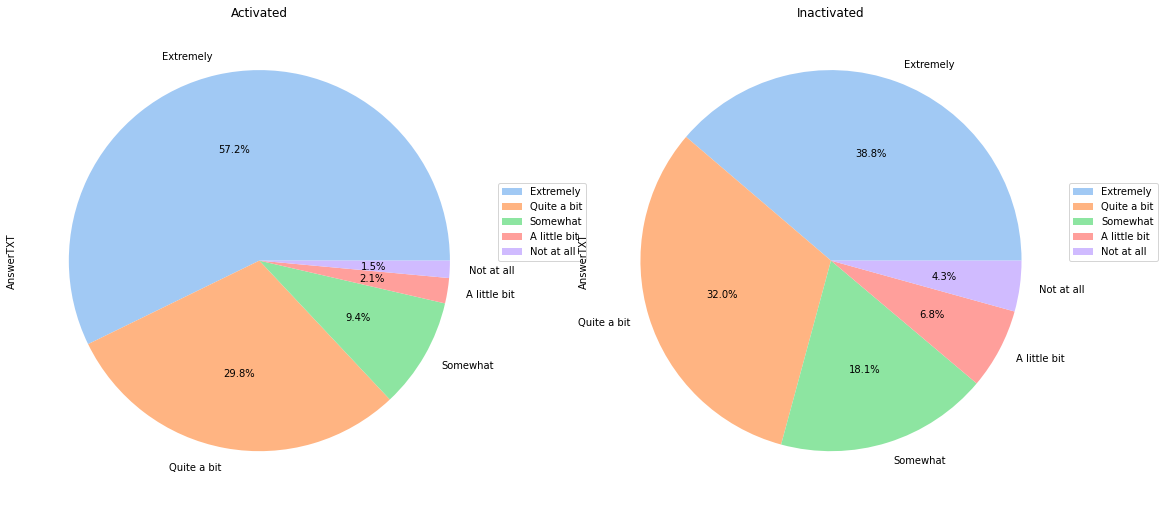

In [ ]:
fig = plt.figure(figsize=(70,20))
for i, s in enumerate(status_social):

  status_1=fillingforms[fillingforms['BinaryStatus']==s]
  data_fillingforms=status_1['AnswerTXT'].value_counts()[:5].sort_values(ascending=False)
  labels = data_fillingforms.index
  colors = sns.color_palette('pastel')[0:5]
  plt.subplot(1,7,i+1)
  data_fillingforms.plot.pie(autopct="%.1f%%",colors=colors,labels=labels,subplots=True)
  plt.legend(loc=(1.0,0.5)) 
  plt.title(s)

#### **In general, please rate how well you carry out your usual social activities and roles.**

Subsetting the question by the question id

In [ ]:
activities = df[df['QuestionID'] == 1400001776]
status_activities=['Activated', 'Inactivated']

Plotting the percentage of responses for the active and inactive status

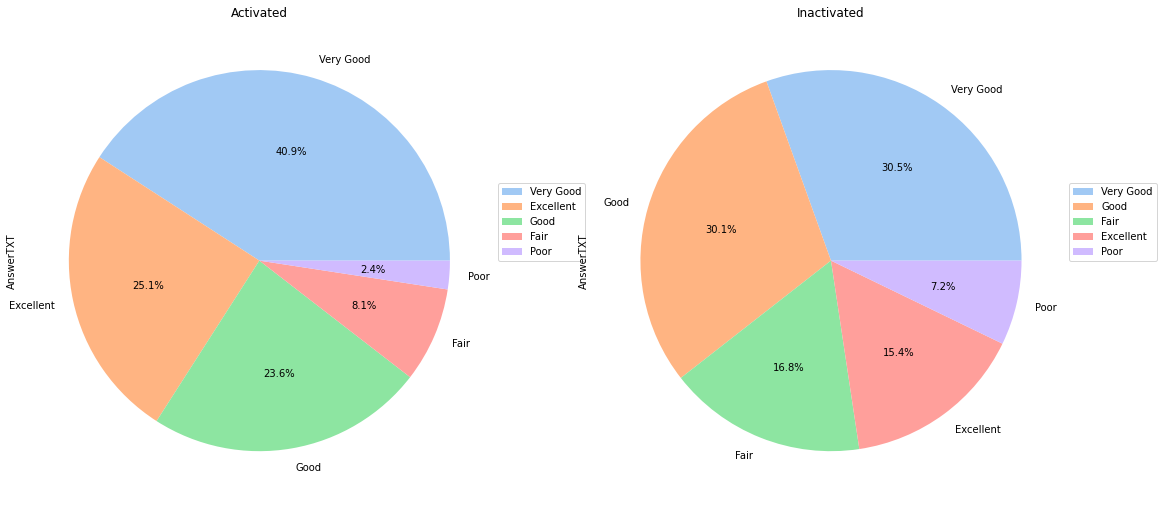

In [ ]:
fig = plt.figure(figsize=(70,20))
for i, s in enumerate(status_social):

  status_1=activities[activities['BinaryStatus']==s]
  data_activities=status_1['AnswerTXT'].value_counts()[:5].sort_values(ascending=False)
  labels = data_activities.index
  colors = sns.color_palette('pastel')[0:5]
  plt.subplot(1,7,i+1)
  data_activities.plot.pie(autopct="%.1f%%",colors=colors,labels=labels,subplots=True)
  plt.legend(loc=(1.0,0.5)) 
  plt.title(s)

#### **PROMIS Score (Mental)**

Subsetting the question by the question id

In [ ]:
promismental = df[df['QuestionID'] == 1400001788]
status_promismental=['Activated', 'Inactivated']

In [ ]:
promismental= promismental[promismental["AnswerTXT"]!= 'Incomplete']
promismental["AnswerTXT"] = pd.to_numeric(promismental["AnswerTXT"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Printing the average PROMIS Mental scores for each status

In [ ]:
for i, s in enumerate(status_promismental):
  status_1=promismental[promismental['BinaryStatus']==s]
  average=status_1["AnswerTXT"].mean()
  print("The Average PROMIS Mental score for the "+str(s)+" status was "+str(round(average,2)))

The Average PROMIS Mental score for the Activated status was 47.57
The Average PROMIS Mental score for the Inactivated status was 41.58


#### **PROMIS Score (Physical)**

Subsetting the question by the question id

In [ ]:
promisphysical = df[df['QuestionID'] == 1400001787]
status_promisphysical=['Activated', 'Inactivated']

In [ ]:
promisphysical= promisphysical[promisphysical["AnswerTXT"]!= 'Incomplete']

In [ ]:
promisphysical["AnswerTXT"] = pd.to_numeric(promisphysical["AnswerTXT"])

Printing the average PROMIS Physical scores for each status

In [ ]:
for i, s in enumerate(status_promisphysical):
  status_1=promisphysical[promisphysical['BinaryStatus']==s]
  average=status_1["AnswerTXT"].mean()
  print("The Average PROMIS Physical score for the "+str(s)+" status was "+str(round(average,2)))

The Average PROMIS Physical score for the Activated status was 43.69
The Average PROMIS Physical score for the Inactivated status was 32.02


### **Building Random Forest and Linear Regression Models**

To predict the features that are significantly effecting patients' MyChart status, we built a random forest model to extract the most important features in predicting the MyChart Status.That enables us to see which answers for each question are the most important in predicting whether the MyChart status is active or inactive and rank those answers by their importance. We also wanted to see how are the important features(answers) related to the MyChart Status.For that reason we then used a logistic regression to see whether the important features(answers) are positively or negatively correlated with having an active status. The coefficients we extract from the regression will help us do so. We used a logistic regression since we are trying to predict a binary outcome, which is MyChart status being active or inactive.

In [ ]:
questionid_list=list(df.QuestionID.unique()) #Getting the list of question id's

Below we are looping through each question and building a Random Forest Model for it, we are then doing a logistic regression for its five top features. In our plots,we discarded two questions that had a binary answers. This is because they have one feature and plotting their feature importance doesn't make sense. Instead for these, we straight up used that one feature in our logistic regression. That will allow us to see if the answer is positively or negatively correlated with an active status

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Optimization terminated successfully.
         Current function value: 275.518417
         Iterations 5


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Optimization terminated successfully.
         Current function value: 292.215060
         Iterations 5


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Optimization terminated successfully.
         Current function value: 289.960030
         Iterations 6


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Optimization terminated successfully.
         Current function value: 286.332810
         Iterations 5


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Optimization terminated successfully.
         Current function value: 312.007080
         Iterations 6


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Optimization terminated successfully.
         Current function value: 311.069106
         Iterations 5


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Optimization terminated successfully.
         Current function value: 310.887581
         Iterations 6


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Optimization terminated successfully.
         Current function value: 295.328498
         Iterations 6


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Optimization terminated successfully.
         Current function value: 320.192758
         Iterations 7


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Optimization terminated successfully.
         Current function value: 62.473999
         Iterations 5


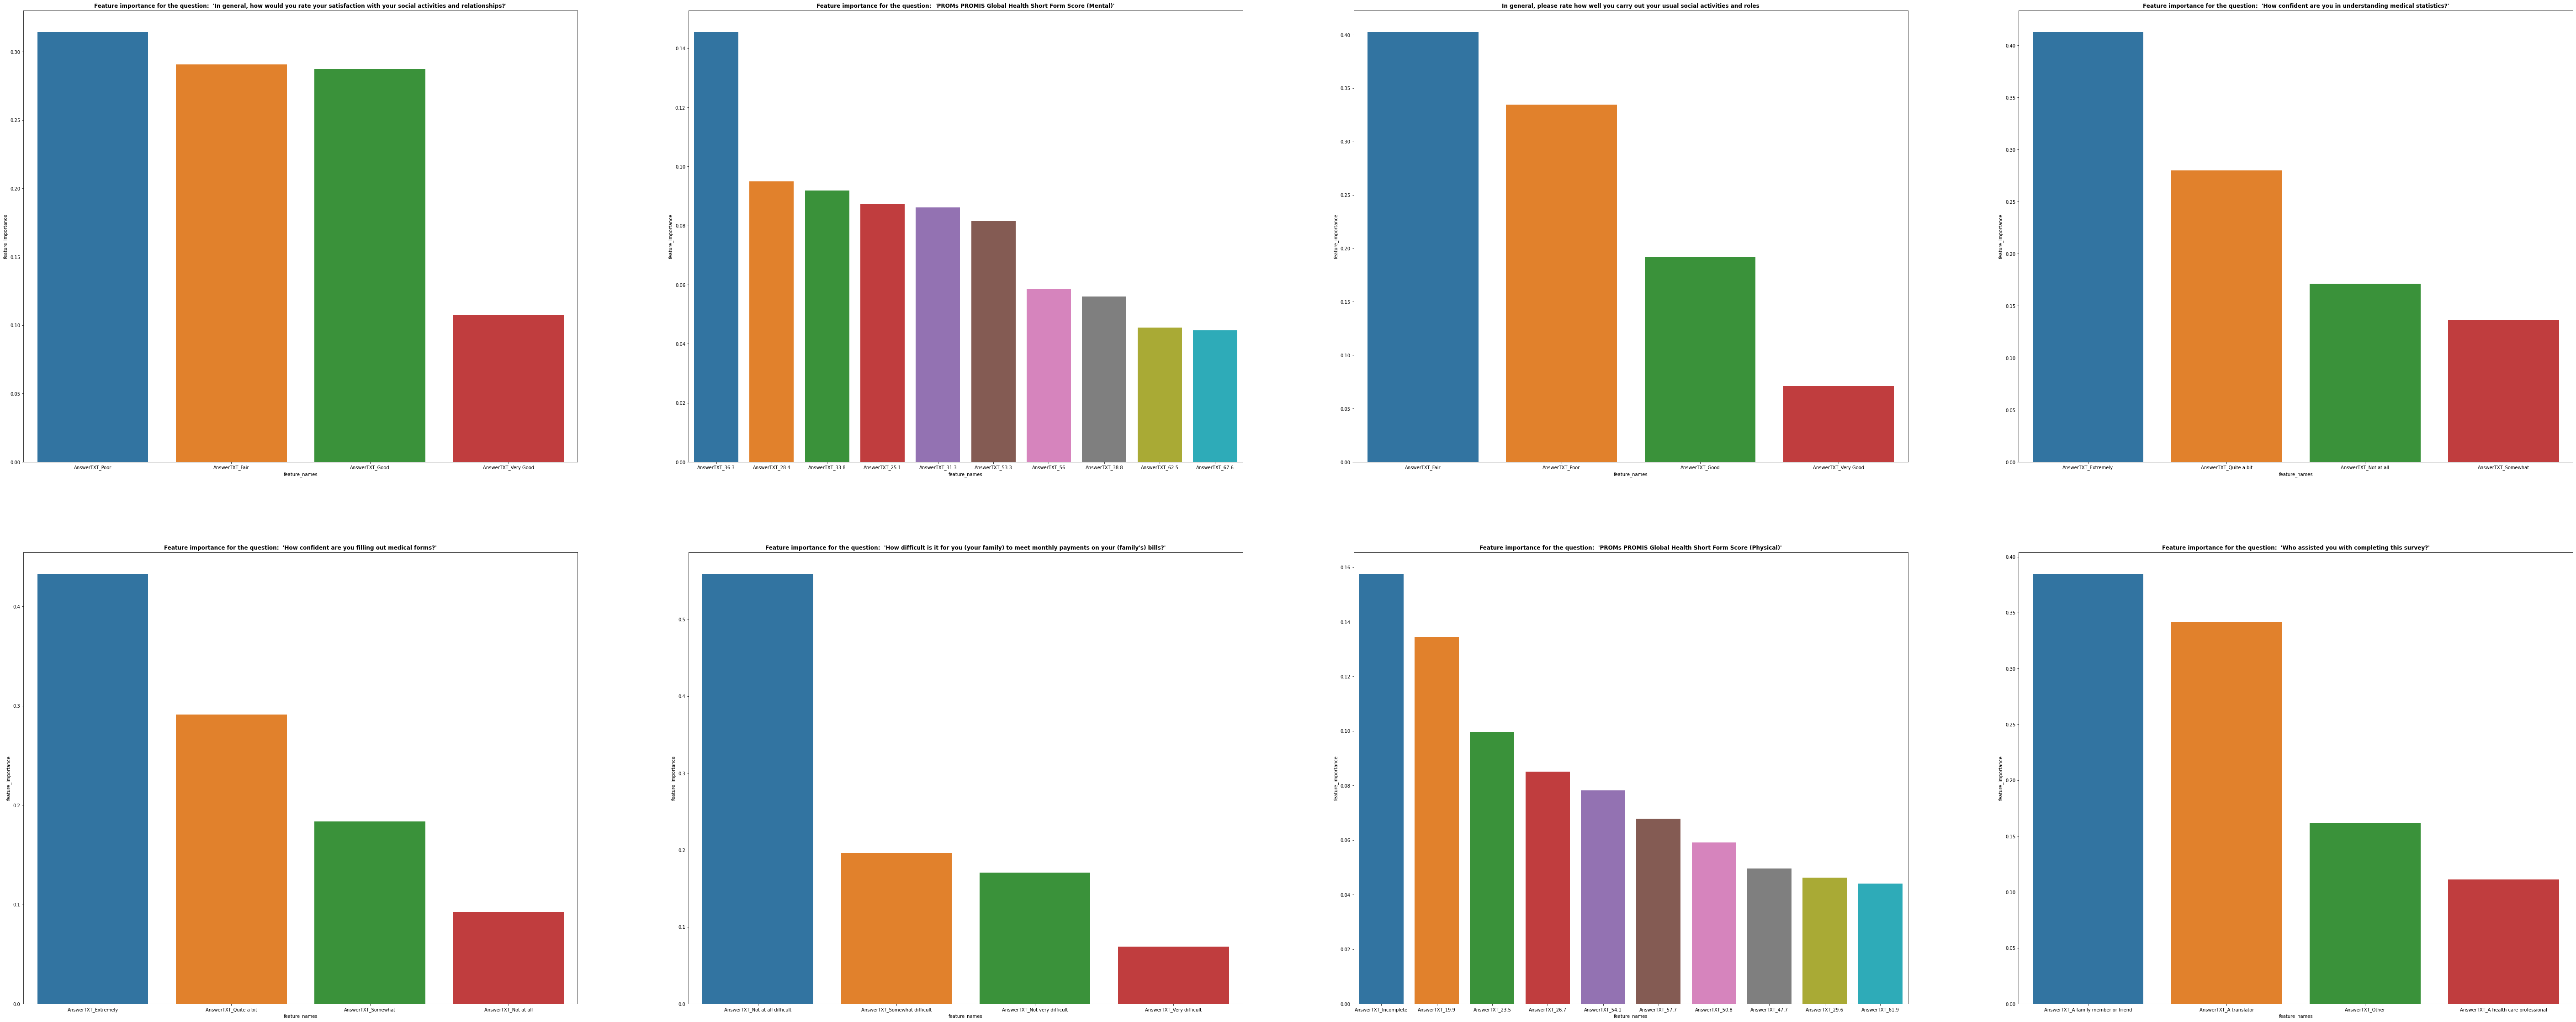

In [ ]:
accuracy_scores=pd.DataFrame(columns=['Question','Accuracy Score']) #Creating the dataframe that will store the each question and its test set accuracy score of the Random Forest Model
regression_output=pd.DataFrame(columns=['Question','Answers','Coefficient','p-value','y-variable'])
fig = plt.figure(figsize=(100,40)) 
for i, s in enumerate (questionid_list): #Looping through the question id's
    subset_data=df[df['QuestionID']==s] #Subsetting the data based on the id
    question=subset_data['QuestionTXT'].iloc[0] #Extracting the question from the data, to be used for plotting and the accuracy scores dataframe
    subset_data=pd.DataFrame(subset_data,columns=['AnswerTXT','BinaryStatus']) #Subsetting the data for mainly answers and their method
    subset_data=pd.get_dummies(subset_data,drop_first=True) #Converting the answers into dummy variables and dropping one from each column to avoid multicolinearity
    features=list(subset_data.columns)[:-1] #Creating the x-axis for the model, selecting all the columns except the last one
    labels=list(subset_data.columns)[-1]  #Creating the y-axis, selecting only the last column
    X_train, X_test, y_train, y_test = train_test_split(subset_data[features], subset_data[labels], test_size=0.3) #Doing a train-test split, setting aside 30% of the data for testing
    clf=RandomForestClassifier(n_estimators=100) #Creating the Random Forest Model
    clf.fit(X_train,y_train) #Fitting the model on the data
    y_pred=clf.predict(X_test) #Performing predictions on the test set
    accuracy=metrics.accuracy_score(y_test, y_pred) #Calculating the accuracy for the test set
    row= {'Question':question,'Accuracy Score': accuracy} #Creating a with each question and the accuracy score of its model
    accuracy_scores=accuracy_scores.append(row,ignore_index=True) #Appending the row to the dataframe
    features_dict={'feature_names':X_train.columns,'feature_importance':clf.feature_importances_} #Creating a dictionary with the features and their importance
    fi_df = pd.DataFrame(features_dict) #Converting the dictionary into a dataframe
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True) #Sorting the values in descending order
    fi_df=fi_df.iloc[:10] #Taking the top 10 features
    if i<3:               #Discarding the plots with binary answers
     plt.subplot(2,4,i+1) 
    elif i<5:
     plt.subplot(2,4,i) 
    else:
      plt.subplot(2,4,i-1) 
    if i!=3 and i!=5:
      if i==2:
        plt.title('In general, please rate how well you carry out your usual social activities and roles',fontweight='bold') #This is to adjust the title for the third plot since it was long
      else:
        plt.title('Feature importance for the question:  '+"'"+question+"'",fontweight='bold')
      sns.barplot(x=fi_df['feature_names'],y=fi_df['feature_importance'])
    elif i!=5 and i>3:
        plt.title('Feature importance for the question:  '+"'"+question+"'",fontweight='bold')
        sns.barplot(x=fi_df['feature_names'],y=fi_df['feature_importance'])
    


    #Creating regressions based on the top 5 features
    y =subset_data[list(subset_data.columns)[-1]] #Defining the X and y variables
    X = subset_data[list(fi_df.feature_names.iloc[:5])] 
    X = sm.add_constant(X) # adding a constant
    model=sm.Logit(y,X).fit()
    row2={'Question':question,'Answers':list(fi_df.feature_names.iloc[:5]),'Coefficient': model.params[1:], 'p-value':model.pvalues[1:],'y-variable':list(subset_data.columns)[-1]}
    regression_output=regression_output.append(row2,ignore_index=True)

We then created a dataframe with the coefficients and p-values for every question. The coeffficients are listed in the same order they appear in the graph, which is from the most important to least important in the Random Forest models.The y-variable is Inactive status, so the lower the value of the coefficient the more likely the status is active.

In [ ]:
regression_output 

,Question,Answers,Coefficient,p-value,y-variable
0,"In general, how would you rate your satisfacti...","[AnswerTXT_Poor, AnswerTXT_Fair, AnswerTXT_Goo...",AnswerTXT_Poor 0.978288 AnswerTXT_Fair...,AnswerTXT_Poor 3.399086e-38 AnswerTXT_...,BinaryStatus_Inactivated
1,PROMs PROMIS Global Health Short Form Score (M...,"[AnswerTXT_36.3, AnswerTXT_28.4, AnswerTXT_33....",AnswerTXT_36.3 1.048411 AnswerTXT_28.4 1...,AnswerTXT_36.3 3.337771e-131 AnswerTXT_28.4...,BinaryStatus_Inactivated
2,"In general, please rate how well you carry out...","[AnswerTXT_Fair, AnswerTXT_Poor, AnswerTXT_Goo...",AnswerTXT_Fair 1.220471 AnswerTXT_Poor...,AnswerTXT_Fair 8.475383e-146 AnswerTXT...,BinaryStatus_Inactivated
3,Do you currently live alone?,[AnswerTXT_Yes],AnswerTXT_Yes 0.193041 dtype: float64,AnswerTXT_Yes 2.554746e-08 dtype: float64,BinaryStatus_Inactivated
4,How confident are you in understanding medical...,"[AnswerTXT_Extremely, AnswerTXT_Quite a bit, A...",AnswerTXT_Extremely -1.377048 AnswerTXT_Qu...,AnswerTXT_Extremely 1.423534e-155 AnswerT...,BinaryStatus_Inactivated
5,Did you complete this survey on your own?,[AnswerTXT_Y],AnswerTXT_Y -1.197863 dtype: float64,AnswerTXT_Y 7.670159e-263 dtype: float64,BinaryStatus_Inactivated
6,How confident are you filling out medical forms?,"[AnswerTXT_Extremely, AnswerTXT_Quite a bit, A...",AnswerTXT_Extremely -1.549465 AnswerTXT_Qu...,AnswerTXT_Extremely 1.998068e-145 AnswerT...,BinaryStatus_Inactivated
7,How difficult is it for you (your family) to m...,"[AnswerTXT_Not at all difficult, AnswerTXT_Som...",AnswerTXT_Not at all difficult -1.315630 Ans...,AnswerTXT_Not at all difficult 1.775549e-33...,BinaryStatus_Inactivated
8,PROMs PROMIS Global Health Short Form Score (P...,"[AnswerTXT_Incomplete, AnswerTXT_19.9, AnswerT...",AnswerTXT_Incomplete 2.341456 AnswerTXT_19....,AnswerTXT_Incomplete 3.841495e-168 AnswerTX...,BinaryStatus_Inactivated
9,Who assisted you with completing this survey?,"[AnswerTXT_A family member or friend, AnswerTX...",AnswerTXT_A family member or friend -1.2229...,AnswerTXT_A family member or friend 0.0421...,BinaryStatus_Inactivated


The y-variable is Inactive status, so the lower the value of the coefficient the more likely the status is active.
E.g. for the first question, the answer "Very Good" has the lowest value among all, therefore, patients with a very good social satisfaction are most likely to have an active status.

The accuracy scores of the test sets of the random forest, this shows that the models built weren't overfitting the data. This means that the results are generalizable.

In [ ]:
accuracy_scores

,Question,Accuracy Score
0,"In general, how would you rate your satisfacti...",0.794013
1,PROMs PROMIS Global Health Short Form Score (M...,0.797228
2,"In general, please rate how well you carry out...",0.794376
3,Do you currently live alone?,0.801459
4,How confident are you in understanding medical...,0.811294
5,Did you complete this survey on your own?,0.807803
6,How confident are you filling out medical forms?,0.807345
7,How difficult is it for you (your family) to m...,0.800154
8,PROMs PROMIS Global Health Short Form Score (P...,0.807249
9,Who assisted you with completing this survey?,0.596748


## **Q3: How are the questionnaire responders different from non-responders?**

### **Exploring the questionnaire**

What questions are in the questionnaire?

In [ ]:
questionnaire['QuestionTXT'].value_counts()

Do you currently live alone?                                                                                                                                                                                                         41966
How confident are you filling out medical forms?                                                                                                                                                                                     41809
How confident are you in understanding medical statistics?                                                                                                                                                                           41809
Did you complete this survey on your own?                                                                                                                                                                                            41786
How difficult is it for you (your family) to meet monthly pa

Are there people who answer questionnaire multiple times?

In [ ]:
multi_questionnaire = pd.DataFrame(questionnaire.groupby('DFCIMRN')['RootAnswerID'].nunique()).reset_index()
multi_questionnaire.groupby('RootAnswerID')['DFCIMRN'].nunique()

RootAnswerID
0    102219
1     35706
2      2393
3       246
4        28
5         4
Name: DFCIMRN, dtype: int64

There are 102219 patients who didn't answer questionnaire,
35706 patients answer quetionnire once

Are there people who didn't answer all questions in the questionnaire?

In [ ]:
df2 = questionnaire.AnswerTXT.isnull().groupby(questionnaire["DFCIMRN"]).sum().astype(int).reset_index(name='count_df2')
df3 = questionnaire.RootAnswerID.isnull().groupby(questionnaire["DFCIMRN"]).sum().astype(int).reset_index(name='count_df3')
df4 = df3.merge(df2, on ='DFCIMRN', how = 'left')
df4['DFCIMRN'] = df4['DFCIMRN'].astype(str)

In [ ]:
df4[(df4['count_df3'] == 0)&(df4['count_df2'] != 0)]['DFCIMRN'].nunique() # number of people who didn't answer all questions but were assgined questionnaire 

2397

There are 2397 patients who responder to questionnaire but didn't answer all the questions on the quesitonnaire 

In [ ]:
patient = list(df4[(df4['count_df3'] == 0)&(df4['count_df2'] >= 10)]['DFCIMRN'])
len(patient) # Number of people who didn't answer all questions but were assgined questionnaire 

0

No patient submitted a completely unanswered questionnaire

### **Combining questionnaire info with demographic info**

Looking at the questionnaire responders data

In [ ]:
multi_questionnaire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140596 entries, 0 to 140595
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   DFCIMRN       140596 non-null  object
 1   RootAnswerID  140596 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.1+ MB


Viewing a sample of the data

In [ ]:
multi_questionnaire.sample(5)

,DFCIMRN,RootAnswerID
113281,0xCE681477040A0E87D76B8182318E75C42D3BAB7CD4A4...,1
126256,0xE5D36ED5B37E16E509138B261CB3F3DA07EEFC3AB6DF...,0
51238,0x5D9D76968BAAD0154CC76805DE78E4DD246126DA4D42...,1
50428,0x5C18CD59FEBB06C578ABAD97BDAEC50D0F84EDF4989A...,0
137969,0xFB44942320FB766409C19533E3EC53DFA1C6D2CBCD36...,0


Looking at our demographic dataset

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699432 entries, 0 to 699431
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   DFCIMRN                 699432 non-null  object
 1   PatientBirthDTS         699432 non-null  int64 
 2   GenderDSC               699432 non-null  object
 3   InterpreterRequiredFLG  699432 non-null  object
 4   PrimaryLanguageNM       699432 non-null  object
 5   RaceDSC                 699432 non-null  object
 6   EthnicityNM             699432 non-null  object
 7   MyChartStatusDSC        699432 non-null  object
 8   MilesFromLongwoodRange  699432 non-null  object
 9   Age                     699432 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 53.4+ MB


Dropping duplicates

In [ ]:
data.drop_duplicates(subset='DFCIMRN', inplace=True)

Loooking at the data after we have dropped duplicates

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699432 entries, 0 to 699431
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   DFCIMRN                 699432 non-null  object
 1   PatientBirthDTS         699432 non-null  int64 
 2   GenderDSC               699432 non-null  object
 3   InterpreterRequiredFLG  699432 non-null  object
 4   PrimaryLanguageNM       699432 non-null  object
 5   RaceDSC                 699432 non-null  object
 6   EthnicityNM             699432 non-null  object
 7   MyChartStatusDSC        699432 non-null  object
 8   MilesFromLongwoodRange  699432 non-null  object
 9   Age                     699432 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 58.7+ MB


Merging thee two datasets

In [ ]:
Data_questionnaire = multi_questionnaire.merge(data,on='DFCIMRN',how='left')

In [ ]:
add = questionnaire[['DFCIMRN','RootQuestionnaireID']]
add.drop_duplicates(subset='DFCIMRN', inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
Data_questionnaire = Data_questionnaire.merge(add,on='DFCIMRN',how='left')

Looking at the new merged dataset

In [ ]:
Data_questionnaire.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140596 entries, 0 to 140595
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   DFCIMRN                 140596 non-null  object 
 1   RootAnswerID            140596 non-null  int64  
 2   PatientBirthDTS         140019 non-null  float64
 3   GenderDSC               140019 non-null  object 
 4   InterpreterRequiredFLG  140019 non-null  object 
 5   PrimaryLanguageNM       140019 non-null  object 
 6   RaceDSC                 140019 non-null  object 
 7   EthnicityNM             140019 non-null  object 
 8   MyChartStatusDSC        140019 non-null  object 
 9   MilesFromLongwoodRange  140019 non-null  object 
 10  Age                     140019 non-null  float64
 11  RootQuestionnaireID     140596 non-null  int64  
dtypes: float64(2), int64(2), object(8)
memory usage: 13.9+ MB


Dropping duplicates of the merged dataset

In [ ]:
Data_questionnaire.drop_duplicates(subset='DFCIMRN', inplace=True)
Data_questionnaire.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140596 entries, 0 to 140595
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   DFCIMRN                 140596 non-null  object 
 1   RootAnswerID            140596 non-null  int64  
 2   PatientBirthDTS         140019 non-null  float64
 3   GenderDSC               140019 non-null  object 
 4   InterpreterRequiredFLG  140019 non-null  object 
 5   PrimaryLanguageNM       140019 non-null  object 
 6   RaceDSC                 140019 non-null  object 
 7   EthnicityNM             140019 non-null  object 
 8   MyChartStatusDSC        140019 non-null  object 
 9   MilesFromLongwoodRange  140019 non-null  object 
 10  Age                     140019 non-null  float64
 11  RootQuestionnaireID     140596 non-null  int64  
dtypes: float64(2), int64(2), object(8)
memory usage: 13.9+ MB


Counting the null values

In [ ]:
Data_questionnaire.isna().sum()

DFCIMRN                     0
RootAnswerID                0
PatientBirthDTS           577
GenderDSC                 577
InterpreterRequiredFLG    577
PrimaryLanguageNM         577
RaceDSC                   577
EthnicityNM               577
MyChartStatusDSC          577
MilesFromLongwoodRange    577
Age                       577
RootQuestionnaireID         0
dtype: int64

There are 577 patients in the demographic dataset but not in the questionnaire dataset. As a result, we won't be able to look into the demographic of these patients, therefore, we decide to drop these data points before further analysis.

In [ ]:
Data_questionnaire.dropna(inplace = True)

In [ ]:
Data_questionnaire.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140019 entries, 0 to 140595
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   DFCIMRN                 140019 non-null  object 
 1   RootAnswerID            140019 non-null  int64  
 2   PatientBirthDTS         140019 non-null  float64
 3   GenderDSC               140019 non-null  object 
 4   InterpreterRequiredFLG  140019 non-null  object 
 5   PrimaryLanguageNM       140019 non-null  object 
 6   RaceDSC                 140019 non-null  object 
 7   EthnicityNM             140019 non-null  object 
 8   MyChartStatusDSC        140019 non-null  object 
 9   MilesFromLongwoodRange  140019 non-null  object 
 10  Age                     140019 non-null  float64
 11  RootQuestionnaireID     140019 non-null  int64  
dtypes: float64(2), int64(2), object(8)
memory usage: 13.9+ MB


#### **Subsetting nonresponders and responders**

In [ ]:
nonresponders = Data_questionnaire[Data_questionnaire['RootAnswerID'] == 0].reset_index()
nonresponders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101981 entries, 0 to 101980
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   index                   101981 non-null  int64  
 1   DFCIMRN                 101981 non-null  object 
 2   RootAnswerID            101981 non-null  int64  
 3   PatientBirthDTS         101981 non-null  float64
 4   GenderDSC               101981 non-null  object 
 5   InterpreterRequiredFLG  101981 non-null  object 
 6   PrimaryLanguageNM       101981 non-null  object 
 7   RaceDSC                 101981 non-null  object 
 8   EthnicityNM             101981 non-null  object 
 9   MyChartStatusDSC        101981 non-null  object 
 10  MilesFromLongwoodRange  101981 non-null  object 
 11  Age                     101981 non-null  float64
 12  RootQuestionnaireID     101981 non-null  int64  
dtypes: float64(2), int64(3), object(8)
memory usage: 10.1+ MB


In [ ]:
responders = Data_questionnaire[Data_questionnaire['RootAnswerID'] > 0].reset_index()
responders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38038 entries, 0 to 38037
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   index                   38038 non-null  int64  
 1   DFCIMRN                 38038 non-null  object 
 2   RootAnswerID            38038 non-null  int64  
 3   PatientBirthDTS         38038 non-null  float64
 4   GenderDSC               38038 non-null  object 
 5   InterpreterRequiredFLG  38038 non-null  object 
 6   PrimaryLanguageNM       38038 non-null  object 
 7   RaceDSC                 38038 non-null  object 
 8   EthnicityNM             38038 non-null  object 
 9   MyChartStatusDSC        38038 non-null  object 
 10  MilesFromLongwoodRange  38038 non-null  object 
 11  Age                     38038 non-null  float64
 12  RootQuestionnaireID     38038 non-null  int64  
dtypes: float64(2), int64(3), object(8)
memory usage: 3.8+ MB


In [ ]:
responders['DFCIMRN'].nunique()

38038

### **Comparing the demographics of responders to non-responders**

Below, we are comparing the demographics of those who respond to surveys to those who don't.

#### **Composition**

Looking at the proportion of patients who respond/ don't respond to surveys

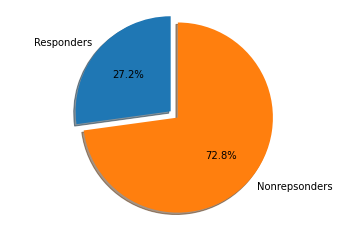

In [ ]:
labels = 'Responders', 'Nonrepsonders'
sizes = [len(responders), len(nonresponders)]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

####**Year of Birth**

Comparing the birth year density of responders to non-responders

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Density')

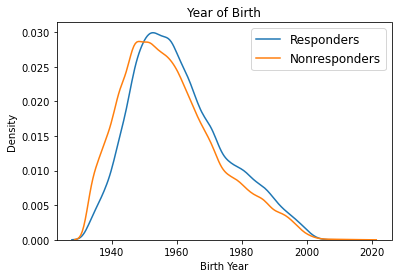

In [ ]:
sns.distplot(responders['PatientBirthDTS'], hist = False, kde=True, label='Responders')

sns.distplot(nonresponders['PatientBirthDTS'], hist = False, kde=True,label='Nonresponders')

# Plot formatting
plt.legend(prop={'size': 12})
plt.title('Year of Birth')
plt.xlabel('Birth Year')
plt.ylabel('Density')

Overall, responders are slightly younger than nonsresponders

####**Gender**

Comparing gender ratios of responders to non-responders

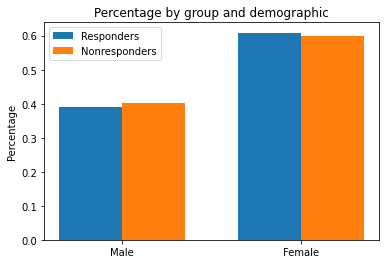

In [ ]:
N = 2
men_means = (len(responders[responders['GenderDSC'] == 'Male'])/len(responders), len(responders[responders['GenderDSC'] == 'Female'])/len(responders))
women_means = (len(nonresponders[nonresponders['GenderDSC'] == 'Male'])/len(nonresponders), len(nonresponders[nonresponders['GenderDSC'] == 'Female'])/len(nonresponders))

ind = np.arange(N) 
width = 0.35       
plt.bar(ind, men_means, width, label='Responders')
plt.bar(ind + width, women_means, width,
    label='Nonresponders')

plt.ylabel('Percentage')
plt.title('Percentage by group and demographic')

plt.xticks(ind + width / 2, ('Male', 'Female'))
plt.legend(loc='best')
plt.show()

Gender ratio is every similar between responders and nonresponders

#### **Interpreter**


Comparing the percentage of patients who need an interpreter

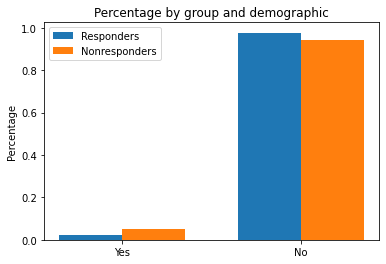

In [ ]:
N = 2
men_means = (len(responders[responders['InterpreterRequiredFLG'] == 'Y'])/len(responders), len(responders[responders['InterpreterRequiredFLG'] == 'N'])/len(responders))
women_means = (len(nonresponders[nonresponders['InterpreterRequiredFLG'] == 'Y'])/len(nonresponders), len(nonresponders[nonresponders['InterpreterRequiredFLG'] == 'N'])/len(nonresponders))

ind = np.arange(N) 
width = 0.35       
plt.bar(ind, men_means, width, label='Responders')
plt.bar(ind + width, women_means, width,
    label='Nonresponders')

plt.ylabel('Percentage')
plt.title('Percentage by group and demographic')

plt.xticks(ind + width / 2, ('Yes', 'No'))
plt.legend(loc='best')
plt.show()

Most patients don't need interpreters and nonresponders are only a bit more likely to request interpreters

####**Ethnicity**

Looking at the proportion of ethnicities among the non-responders

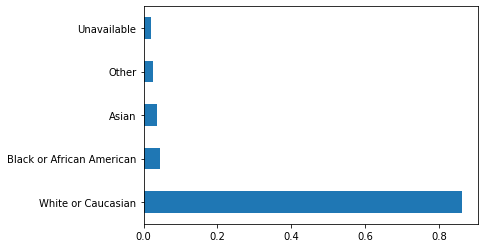

In [ ]:
(nonresponders['RaceDSC'].value_counts()/len(nonresponders))[:5].plot(kind='barh')

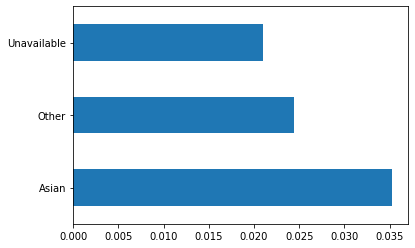

In [ ]:
(nonresponders['RaceDSC'].value_counts()/len(nonresponders))[2:5].plot(kind='barh')

Looking at the proportion of ethnicities among responders

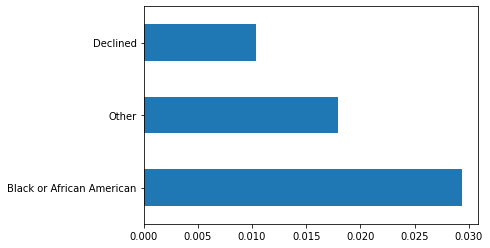

In [ ]:
(responders['RaceDSC'].value_counts()/len(responders))[2:5].plot(kind='barh')

The presence of Black or African Americans in non-responder is twice as much as in responders (2.8% vs 4.5%)

####**Primary Languages**

Looking at the primary language distribution of responders

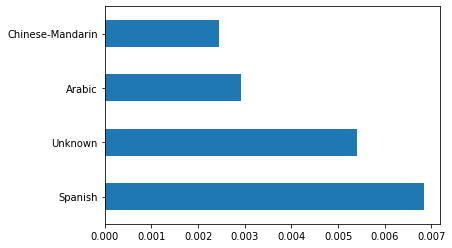

In [ ]:
(responders['PrimaryLanguageNM'].value_counts()/len(responders))[1:5].plot(kind='barh')

Looking at the primary language distribution of non-responders

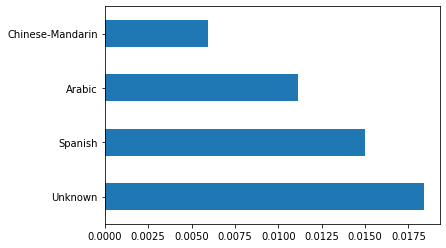

In [ ]:
(nonresponders['PrimaryLanguageNM'].value_counts()/len(nonresponders))[1:5].plot(kind='barh')

Non-responders are triple as likely to have Primary Language unavailable ( 1.8% vs 0.52%). Spanish speaking patients are twice as likely to be non-responders than to be responders

####**MyChart StatusDSC**

Looking at the MyChart Status distribution of responders

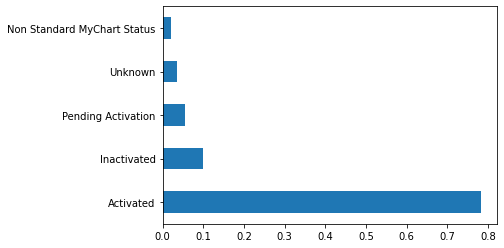

In [ ]:
(responders['MyChartStatusDSC'].value_counts()/len(responders))[:5].plot(kind='barh')

Looking at the MyChart Status distribution of non-responders

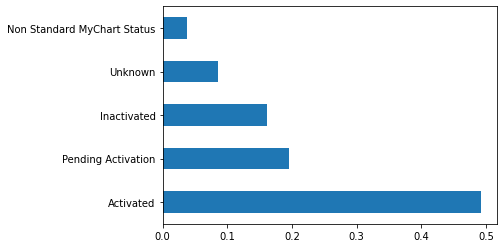

In [ ]:
(nonresponders['MyChartStatusDSC'].value_counts()/len(nonresponders))[:5].plot(kind='barh')

Looking at the proportion of responders to non-responders of patients with an Unknown MyChart status

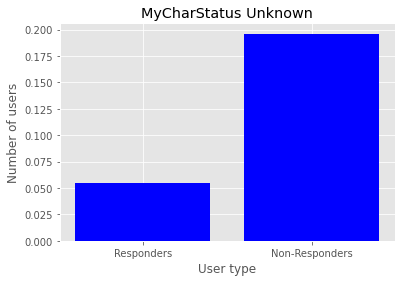

In [ ]:
%matplotlib inline
plt.style.use('ggplot')

x = ['Responders', 'Non-Responders']
energy = [len(responders[responders['MyChartStatusDSC'] == 'Pending Activation']['RootAnswerID'])/len(responders),len(nonresponders[nonresponders['MyChartStatusDSC'] == 'Pending Activation']['RootAnswerID'])/len(nonresponders)]

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, energy, color='blue')
plt.xlabel("User type")
plt.ylabel("Number of users")
plt.title("MyCharStatus Unknown")

plt.xticks(x_pos, x)

plt.show()

More than half of the non-responders have an inactivated MyChart status while almost 80% of responders have an active MyChart status   

####**Miles From Longwood Range**

Looking at the distribution of Miles from Longwood Range of responders

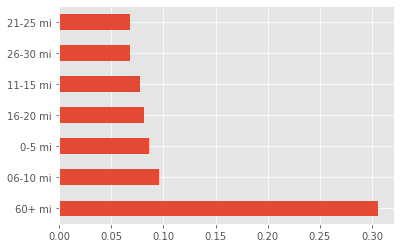

In [ ]:
(responders['MilesFromLongwoodRange'].value_counts()/len(responders))[:7].plot(kind='barh')

Looking at the distribution of Miles from Longwood Range of non-responders

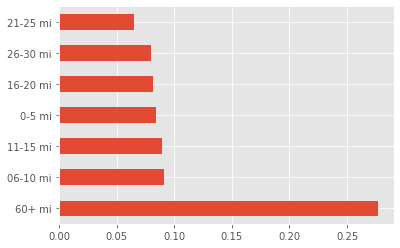

In [ ]:
(nonresponders['MilesFromLongwoodRange'].value_counts()/len(nonresponders))[:7].plot(kind='barh')

####**Family History**

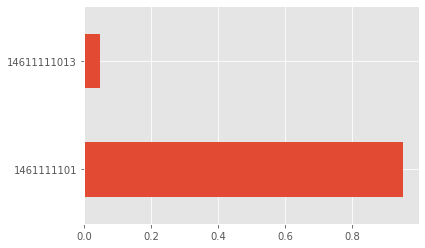

In [ ]:
(responders['RootQuestionnaireID'].value_counts()/len(responders)).plot(kind='barh')

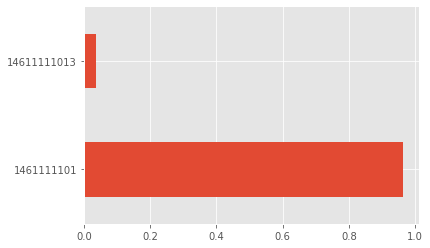

In [ ]:
(nonresponders['RootQuestionnaireID'].value_counts()/len(nonresponders)).plot(kind='barh')

## **Q4: Which groups of patients to target for increasing enrollment?**

### **a) Can we identify demographic or other characteristics of patient groups that exhibit different MyChart enrollment rates?**

#### **Data Preparation**

Two datasets will be used in this section: the questionaire dataset and the demographic dataset. First, let's load the dataset and merge them for later analysis. Since in the previous EDA part, we have taken a look into the two datasets. Here the EDA will be omitted.

In [ ]:
# load the data
drive.mount('/content/drive')
dfqs=pd.read_csv("/content/drive/Shareddrives/Capstone-B6/Dataset/Dataset_Demographics_1_6_22.csv")
dfdemo=pd.read_csv('/content/drive/Shareddrives/Capstone-B6/Dataset/Data Cleaned_Questionaire.csv')

# na values 
dfqs.dropna(inplace=True)
dfdemo.dropna(inplace=True)
# merge the datasets
df1=dfdemo.merge(dfqs,left_on='DFCIMRN',right_on='DFCIMRN',how='inner')
df1.drop_duplicates(inplace=True)
# transfer birth year into age
df1['Age'] = 2022 - df1['PatientBirthDTS']
df1.drop(['PatientBirthDTS'],axis=1,inplace=True)

# the original columns
print("The columns now are",df1.columns)
# delete the useless columns
df1.drop(['DFCIMRN', 'SelfIdentifiedGenderDSC',
       'InterpreterRequiredFLG', 
       'Unnamed: 0',
       'RootQuestionnaireID', 'RootQuestionnaireNM', 'RootAnswerID',
       'FinalEncounterDTSRank', 'QuestionID', 'QuestionTXT', 'AnswerTXT',
       'AnswerMethodDSC', 'RootQuestionnaireStatusDSC'],axis=1,inplace=True)
# a quick check
print('The final columns are:',df1.columns)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
The columns now are Index(['Unnamed: 0', 'DFCIMRN', 'RootQuestionnaireID', 'RootQuestionnaireNM',
       'RootAnswerID', 'FinalEncounterDTSRank', 'QuestionID', 'QuestionTXT',
       'AnswerTXT', 'AnswerMethodDSC', 'RootQuestionnaireStatusDSC',
       'GenderDSC', 'SelfIdentifiedGenderDSC', 'InterpreterRequiredFLG',
       'PrimaryLanguageNM', 'RaceDSC', 'EthnicityNM', 'MyChartStatusDSC',
       'MilesFromLongwoodRange', 'Age'],
      dtype='object')
The final columns are: Index(['GenderDSC', 'PrimaryLanguageNM', 'RaceDSC', 'EthnicityNM',
       'MyChartStatusDSC', 'MilesFromLongwoodRange', 'Age'],
      dtype='object')


**Create The Output Label**

Since only the 'Activated' status is valuable for Dana Faber, we decide to keep the Active status. For the rest of the MyChart Status category, we will mark them all as 'Not activated'.

In [ ]:
def clean_Status(s):
  if s == 'Activated':
    return 1
  else:
    return 0
df1['MyChartStatusDSC']=df1["MyChartStatusDSC"].apply(clean_Status)

Also for the other columns like Race, we replace some values with a more uniformed value. Specific replacement definitions are the same as those in EDA.

In [ ]:
# deal with the race column
def clean_Status1(s):
  if s == 'White':
    return 'White or Caucasian'
  else:
    return s
df1['RaceDSC']=df1["RaceDSC"].apply(clean_Status1)

# deal with the primary language column and the ethnicityNM
def clean_Status2(s):
  if s == 'Unavailable':
    return 'Unknown'
  else:
    return s
df1['PrimaryLanguageNM']=df1["PrimaryLanguageNM"].apply(clean_Status2)
df1['EthnicityNM']=df1["EthnicityNM"].apply(clean_Status2)

#### **Logsitic Regression**

After our initial investigation we noticed that there are severe collinearity among the variables. Therfore, we decided to run several regressions for different explanatory variables.

##### **Gender and Age**

In [ ]:
# get the dummy variables
standard=df1.copy()
df1= pd.get_dummies(df1,columns=['GenderDSC'])
X=df1.drop(labels=['PrimaryLanguageNM','RaceDSC','EthnicityNM','MilesFromLongwoodRange','MyChartStatusDSC'],axis=1,inplace=False)
y=df1['MyChartStatusDSC']
log_reg = sm.Logit(y, X).fit()
log_reg.summary()

         Current function value: 0.292760
         Iterations: 35


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       MyChartStatusDSC   No. Observations:               173357
Model:                          Logit   Df Residuals:                   173353
Method:                           MLE   Df Model:                            3
Date:                Fri, 06 May 2022   Pseudo R-squ.:                 0.03270
Time:                        19:44:55   Log-Likelihood:                -50752.
converged:                      False   LL-Null:                       -52468.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Age                  -0.0328      0.001    -46.285      0.000      -0.034      -0.031
GenderDSC_Female      4.5477      0.047     97.482      0.000       4.456       4.639
GenderDSC_Male        4.2038      0.050     84.087      0.000       4.106       4.302
GenderDSC_Unknown   -15.5569   1661.068     -0.009      0.993   -3271.190    3240.077
=====================================================================================
"""

For interpretation and explanation of the regression results, please refer to the final report, Question 4, Part 01, iii.Conclusion.

##### **MilesFromLongwoodRange**

In [ ]:
# get the dummy variables
standard1=standard.copy()
standard= pd.get_dummies(standard,columns=['MilesFromLongwoodRange'])
# run the regression
X=standard.drop(labels=['GenderDSC','RaceDSC','EthnicityNM','PrimaryLanguageNM','MyChartStatusDSC'],axis=1,inplace=False)
y=standard['MyChartStatusDSC']
log_reg = sm.Logit(y, X).fit()
# the regresison output summary
log_reg.summary()

Optimization terminated successfully.
         Current function value: 0.293794
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       MyChartStatusDSC   No. Observations:               173357
Model:                          Logit   Df Residuals:                   173343
Method:                           MLE   Df Model:                           13
Date:                Fri, 06 May 2022   Pseudo R-squ.:                 0.02928
Time:                        19:44:58   Log-Likelihood:                -50931.
converged:                       True   LL-Null:                       -52468.
Covariance Type:            nonrobust   LLR p-value:                     0.000
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Age                                -0.0356      0.001    -50.922      0.000      -0.037      -0.034
MilesFromLongwoodRange_0-5 mi       4.6336      0.053     87.590      0.000       4.530       4.737
MilesFromLongwoodRange_06-10 mi     4.7553      0.053     89.288      0.000       4.651       4.860
MilesFromLongwoodRange_11-15 mi     4.5754      0.055     83.630      0.000       4.468       4.683
MilesFromLongwoodRange_16-20 mi     4.6615      0.055     85.352      0.000       4.554       4.769
MilesFromLongwoodRange_21-25 mi     4.4572      0.054     82.793      0.000       4.352       4.563
MilesFromLongwoodRange_26-30 mi     4.5390      0.055     82.275      0.000       4.431       4.647
MilesFromLongwoodRange_31-35 mi     4.5937      0.061     75.421      0.000       4.474       4.713
MilesFromLongwoodRange_36-40 mi     4.4537      0.060     73.915      0.000       4.336       4.572
MilesFromLongwoodRange_41-45 mi     4.5634      0.063     71.870      0.000       4.439       4.688
MilesFromLongwoodRange_46-50 mi     4.5598      0.068     66.921      0.000       4.426       4.693
MilesFromLongwoodRange_51-55 mi     4.3267      0.067     64.901      0.000       4.196       4.457
MilesFromLongwoodRange_56-60 mi     4.6002      0.072     63.860      0.000       4.459       4.741
MilesFromLongwoodRange_60+ mi       4.5392      0.049     92.005      0.000       4.443       4.636
===================================================================================================
"""

##### **Race**

In [ ]:
# get the dummy variables
standard2=standard1.copy()
standard1= pd.get_dummies(standard1,columns=['RaceDSC'])
# run the regression
X=standard1.drop(labels=['GenderDSC','EthnicityNM','PrimaryLanguageNM','MyChartStatusDSC','MilesFromLongwoodRange',],axis=1,inplace=False)
y=standard1['MyChartStatusDSC']
log_reg = sm.Logit(y, X).fit()
# the regresison output summary
log_reg.summary()

Optimization terminated successfully.
         Current function value: 0.293513
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       MyChartStatusDSC   No. Observations:               173357
Model:                          Logit   Df Residuals:                   173348
Method:                           MLE   Df Model:                            8
Date:                Fri, 06 May 2022   Pseudo R-squ.:                 0.03021
Time:                        19:45:00   Log-Likelihood:                -50882.
converged:                       True   LL-Null:                       -52468.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=====================================================================================================================
                                                        coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
Age                                                  -0.0363      0.001    -51.862      0.000      -0.038      -0.035
RaceDSC_American Indian or Alaska Native              4.5301      0.181     25.075      0.000       4.176       4.884
RaceDSC_Asian                                         4.4830      0.064     70.273      0.000       4.358       4.608
RaceDSC_Black or African American                     4.1221      0.062     66.887      0.000       4.001       4.243
RaceDSC_Declined                                      4.6338      0.115     40.409      0.000       4.409       4.859
RaceDSC_Native Hawaiian or Other Pacific Islander     3.8168      0.349     10.924      0.000       3.132       4.502
RaceDSC_Other                                         4.3696      0.074     59.150      0.000       4.225       4.514
RaceDSC_Unavailable                                   3.9713      0.093     42.651      0.000       3.789       4.154
RaceDSC_White or Caucasian                            4.6559      0.047     98.246      0.000       4.563       4.749
=====================================================================================================================
"""

##### **Ethnicity**

Since there are multicollinearity in the Ethnicity column, we wrote a function fo filter our those columns where the variances are too small to solve the problem.

In [ ]:
# get the dummy variables
standard3=standard2.copy()
standard2= pd.get_dummies(standard2,columns=['EthnicityNM'])
# run the regression
X=standard2.drop(labels=['GenderDSC','RaceDSC','PrimaryLanguageNM','MyChartStatusDSC','MilesFromLongwoodRange','Age'],axis=1,inplace=False)
y=standard2['MyChartStatusDSC']
# deal with multicollinearity

def variance_threshold_selector(data, threshold=0.5):
    selector = VarianceThreshold(threshold)
    selector.fit(data)
    return data[data.columns[selector.get_support(indices=True)]]

# min_variance = .9 * (1 - .9) 
min_variance = 0.01
low_variance = variance_threshold_selector(X, min_variance) 
print('columns removed:')
X.columns ^ low_variance.columns
X.shape
X.shape
X = low_variance
log_reg = sm.Logit(y, X).fit()
# the regresison output summary
log_reg.summary()

columns removed:


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: FutureWarning: Index.__xor__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__xor__.  Use index.symmetric_difference(other) instead


Optimization terminated successfully.
         Current function value: 0.362742
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       MyChartStatusDSC   No. Observations:               173357
Model:                          Logit   Df Residuals:                   173346
Method:                           MLE   Df Model:                           10
Date:                Fri, 06 May 2022   Pseudo R-squ.:                 -0.1985
Time:                        19:45:03   Log-Likelihood:                -62884.
converged:                       True   LL-Null:                       -52468.
Covariance Type:            nonrobust   LLR p-value:                     1.000
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
EthnicityNM_African American     2.1068      0.067     31.580      0.000       1.976       2.238
EthnicityNM_American             2.2952      0.011    215.404      0.000       2.274       2.316
EthnicityNM_Chinese              1.9236      0.067     28.523      0.000       1.791       2.056
EthnicityNM_Declined             2.2955      0.045     50.654      0.000       2.207       2.384
EthnicityNM_European             1.0461      0.046     22.497      0.000       0.955       1.137
EthnicityNM_European-English     2.8582      0.076     37.396      0.000       2.708       3.008
EthnicityNM_European-Irish       2.7476      0.058     47.199      0.000       2.634       2.862
EthnicityNM_European-Italian     2.4578      0.066     37.222      0.000       2.328       2.587
EthnicityNM_Irish                4.1505      0.190     21.791      0.000       3.777       4.524
EthnicityNM_Other-Specify        2.4589      0.069     35.557      0.000       2.323       2.594
EthnicityNM_Unknown              2.1258      0.028     74.993      0.000       2.070       2.181
================================================================================================
"""

##### **Primary Language**

For the language column, multicollinearity also exists. Therefore, we have also applied the variance filtering function and then run the logisitic regression.

In [ ]:
# get the dummy variables
standard3= pd.get_dummies(standard3,columns=['PrimaryLanguageNM'])
# run the regression
X=standard3.drop(labels=['GenderDSC','RaceDSC','EthnicityNM','MyChartStatusDSC','MilesFromLongwoodRange','Age'],axis=1,inplace=False)
y=standard3['MyChartStatusDSC']
# deal with multicollinearity
def variance_threshold_selector(data, threshold=0.5):
    selector = VarianceThreshold(threshold)
    selector.fit(data)
    return data[data.columns[selector.get_support(indices=True)]]

# min_variance = .9 * (1 - .9) 
min_variance = 0.01
low_variance = variance_threshold_selector(X, min_variance) 
print('columns removed:')
X.columns ^ low_variance.columns
X.shape
X.shape
X = low_variance
log_reg = sm.Logit(y, X).fit()
# the regresison output summary
log_reg.summary()

columns removed:
Optimization terminated successfully.
         Current function value: 0.304915
         Iterations 6


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Index.__xor__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__xor__.  Use index.symmetric_difference(other) instead
  app.launch_new_instance()


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       MyChartStatusDSC   No. Observations:               173357
Model:                          Logit   Df Residuals:                   173356
Method:                           MLE   Df Model:                            0
Date:                Fri, 06 May 2022   Pseudo R-squ.:               -0.007464
Time:                        19:45:05   Log-Likelihood:                -52859.
converged:                       True   LL-Null:                       -52468.
Covariance Type:            nonrobust   LLR p-value:                       nan
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
PrimaryLanguageNM_English     2.3430      0.009    273.062      0.000       2.326       2.360
=============================================================================================
"""

### **b) Can we develop a model to predict MyChart enrollment?**

#### **Data Preparation**

Copying the dataset to df

In [ ]:
df=df_model.copy()

In [ ]:
df

,DFCIMRN,PatientBirthDTS,GenderDSC,InterpreterRequiredFLG,PrimaryLanguageNM,RaceDSC,EthnicityNM,MyChartStatusDSC,MilesFromLongwoodRange
0,0xF357D6D5BAFA16FB147BE4E26B53962308784F2340E5...,1950,Male,Y,Chinese-Cantonese,Asian,Chinese,Activated,06-10 mi
1,0xCAB615644AA56EFDA9BBABE00E92F4C8F71217FB7E9B...,1948,Male,N,Declined,Unavailable,Unavailable,Inactivated,11-15 mi
2,0x9E5FB55AFEE474BB1D6EF40EA894204D3F599F446CA5...,1960,Female,Unknown,Unknown,Unknown,Unknown,Unknown,60+ mi
3,0xD141C9EC891653F5446C9C9D1A1B3133D22038278669...,1996,Female,N,English,White or Caucasian,Unavailable,Activated,0-5 mi
4,0x0657FE0E68D45F5D88D551BE88DA940683B5E2A30F3C...,1966,Female,N,English,White,American,Activated,60+ mi
...,...,...,...,...,...,...,...,...,...
699427,0x0CBCF3AA529DBB90B67DDA3A65D29AA366CD335DB217...,1947,Female,N,English,White or Caucasian,American,Activated,36-40 mi
699428,0xE7DABF03655C4BE55FB21DD2FA4BE57F3F766DE52E71...,1934,Female,N,English,Unavailable,Declined,Unknown,06-10 mi
699429,0xF72F20379332189B8AAD37B17F98790C32B11E204B39...,1941,Male,N,English,White or Caucasian,Unavailable,Unknown,60+ mi
699430,0x7B8763532D1761055AF2B144F373EC756BD665965461...,1966,Male,N,English,Declined,Declined,Activated,06-10 mi


In [ ]:
df_status = df[df.MyChartStatusDSC != 'Unknown']

Setting index

In [ ]:
df_status.set_index('DFCIMRN',inplace=True)

In [ ]:
df_binary = df_status.copy()

Changing activated status to 1

In [ ]:
df_binary.MyChartStatusDSC.replace('Activated',1,inplace=True)

Changing all other statuses to 0

In [ ]:
df_binary.MyChartStatusDSC.replace(['Inactivated', 'Patient Declined', 'Pending Activation','Non Standard MyChart Status','Activation Code Generated, but Disabled'],0,inplace=True)

Getting dummy variables

In [ ]:
one_hot = pd.get_dummies(df_binary.drop('MyChartStatusDSC',axis=1),columns= df_binary.drop('MyChartStatusDSC',axis=1).columns)

Dividing dataset into train and test sets on the actual dataset

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( one_hot,df_status.MyChartStatusDSC , test_size=0.33, random_state=28)

Dividing dataset into train and test sets on the binary dataset

In [ ]:
X_bin_train, X_bin_test, y_bin_train, y_bin_test = train_test_split( one_hot,df_binary.MyChartStatusDSC , test_size=0.33, random_state=28)

#### **Random Forest Classifier**

In [ ]:
rfc = RandomForestClassifier(n_estimators=150,min_samples_leaf=10,max_features="auto")

Defining function to run the model 

In [ ]:
def run_model(X_train,X_test,y_train,y_test,model):
  model.fit(X_train,y_train)
  y_hat = model.predict(X_test)
  print(accuracy_score(y_test,y_hat))
  return y_hat

Getting model accuracy

In [ ]:
rfc_pred = run_model(X_train,X_test,y_train,y_test,rfc)

0.592675042903517


Applying Balanced Random Forest Classifier

In [ ]:
bfc = BalancedRandomForestClassifier(n_estimators=200)

Getting accuracy

In [ ]:
y_hat_brfc = run_model(X_bin_train,X_bin_test,y_bin_train,y_bin_test,bfc)

0.6227109509073491


#### **Feature Importance**

In [ ]:
y=y_bin_train
x=X_train
coef=[]
for a in np.arange(0,0.0005,0.0002):
  ridge=Ridge(alpha=a,normalize=True)
  ridge_reg=ridge.fit(x,y)
  coef.append(ridge_reg.coef_)
coef=pd.DataFrame(coef)
coef.columns=[X_train.columns]
importance_level=dict()
for i in coef.columns:
  importance_level[i]=sum(coef[i]!=0)
  variable=list(importance_level.keys())
importance=list(importance_level[i] for i in variable)
importance_chart=pd.DataFrame({'Variables':variable,'Importance':importance},index=range(0,448))
importance_chart=importance_chart.sort_values('Importance',ascending=False).reset_index(drop=True,inplace=False)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipel

In [ ]:
importance_chart

,Variables,Importance
0,"(PatientBirthDTS_1933,)",3
1,"(EthnicityNM_Dutch,)",3
2,"(EthnicityNM_English,)",3
3,"(EthnicityNM_Emirati,)",3
4,"(EthnicityNM_Egyptian,)",3
...,...,...
443,"(PrimaryLanguageNM_Belarusian,)",1
444,"(PrimaryLanguageNM_Shanghainese,)",1
445,"(PrimaryLanguageNM_Ndebele,)",1
446,"(PrimaryLanguageNM_Slovak,)",1


Assigning weights

In [ ]:
w0= y_bin_train.count() / (2 * (y_bin_train == 0).sum())
w1 = y_bin_train.count() / (2 * (y_bin_train == 1).sum())

Class weight balance is used  for inbalanced classes

In [ ]:
logistic = LogisticRegression(class_weight={0:w0,1:w1},solver='liblinear')

With Binary Target variable

In [ ]:
y_hat = run_model(X_bin_train,X_bin_test,y_bin_train,y_bin_test,logistic)

0.6397689757603744
